<a href="https://colab.research.google.com/github/Cintia-93/TP-Big-Data/blob/main/BigData_TP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import os
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Preparacion y depuracion del archivo

In [105]:
ruta_de_acceso = '/content/drive/MyDrive/UNI/Big Data/Clase 3'

archivos = os.listdir(ruta_de_acceso)
archivos

dataframes = {}

for archivo in archivos:
  if archivo.endswith('.csv'): #Asegurarse de que se consideren archivos csv
    mes = archivo.split('_')[3].split('.')[0] # Obtener el nombre del mes sin la extensión
    ruta_completa = os.path.join(ruta_de_acceso,archivo) # Ruta de acceso completa
    df = pd.read_csv(ruta_completa) # Cargar el csv en un Dataframe
    df_ventas = df.copy() # Hago copia


    # Transformo todos los valores no numericos en Nan en las columnas Cantidad Pedida y Precio Unitario
    df_ventas['Cantidad Pedida'] = pd.to_numeric(df_ventas['Cantidad Pedida'], errors='coerce')  #El errors= 'coerce' transforma los valores no numericos a NaN'
    df_ventas['Precio Unitario'] = pd.to_numeric(df_ventas['Precio Unitario'], errors='coerce')

    # Elimino todos los Nan y me quedo solo con los valores numericos
    df_ventas = df_ventas.loc[~df_ventas['Cantidad Pedida'].isna()]
    df_ventas = df_ventas.loc[~df_ventas['Precio Unitario'].isna()]

    df_ventas = df_ventas.dropna()


    # Transformo todos los valores numericos al tipo de dato int
    df_ventas['Cantidad Pedida'] = df_ventas['Cantidad Pedida'].astype(int)
    df_ventas['Precio Unitario'] = df_ventas['Precio Unitario'].astype(float)

    dataframes[mes] = df_ventas

dataframes['Diciembre'] #Cambio el mes que voy a utilizar

,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [87]:
# Transformo todos los valores no numericos en Nan en las columnas Cantidad Pedida y Precio Unitario
df_ventas['Cantidad Pedida'] = pd.to_numeric(df_ventas['Cantidad Pedida'], errors='coerce')  #El errors= 'coerce' transforma los valores no numericos a NaN'
df_ventas['Precio Unitario'] = pd.to_numeric(df_ventas['Precio Unitario'], errors='coerce')

# Elimino todos los Nan y me quedo solo con los valores numericos
df_ventas = df_ventas.dropna()

# Transformo todos los valores numericos al tipo de dato int
df_ventas['Cantidad Pedida'] = df_ventas['Cantidad Pedida'].astype(int)
df_ventas['Precio Unitario'] = df_ventas['Precio Unitario'].astype(float)

In [88]:
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

for mes in meses:
  dataframe_mes = dataframes[mes]

In [240]:
def extraer_datos(datos):
  datos['Fecha de Pedido'] = pd.to_datetime(df_ventas['Fecha de Pedido'])
  datos['Hora'] = datos['Fecha de Pedido'].dt.hour
  datos['Dia'] = datos['Fecha de Pedido'].dt.day
  return datos

# 1. Comportamiento de las ventas en los distintos meses:

# ¿Cómo variaron las ventas a lo largo de los diferentes meses?

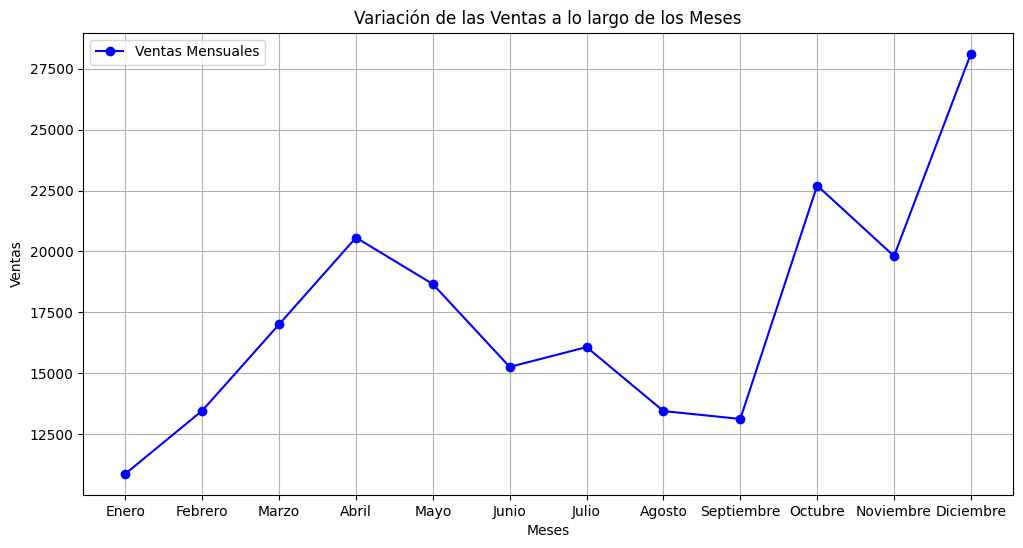

In [90]:
# Crear una lista para almacenar las ventas totales de cada mes
ventas_mensuales = []

for mes in meses:
    if mes in dataframes:
        df = dataframes[mes]
        ventas_mensuales.append(df['Cantidad Pedida'].sum())
    else:
        ventas_mensuales.append(0)  # Si no hay datos para el mes, agregar 0 como ventas

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))  # Tamaño de la figura
plt.plot(meses, ventas_mensuales, marker='o', linestyle='-', color='b', label='Ventas Mensuales')
plt.title('Variación de las Ventas a lo largo de los Meses')
plt.xlabel('Meses')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

# ¿Hubo algún mes que se destacó en términos de ventas?

In [91]:
max_ventas_mes = meses[ventas_mensuales.index(max(ventas_mensuales))]
max_ventas = max(ventas_mensuales)

print(f"El mes con mayores ventas fue {max_ventas_mes} con un total de ventas de {max_ventas}")

El mes con mayores ventas fue Diciembre con un total de ventas de 28121


# ¿Cuál es el ingreso total generado por mes?

## Proyeccion Anual

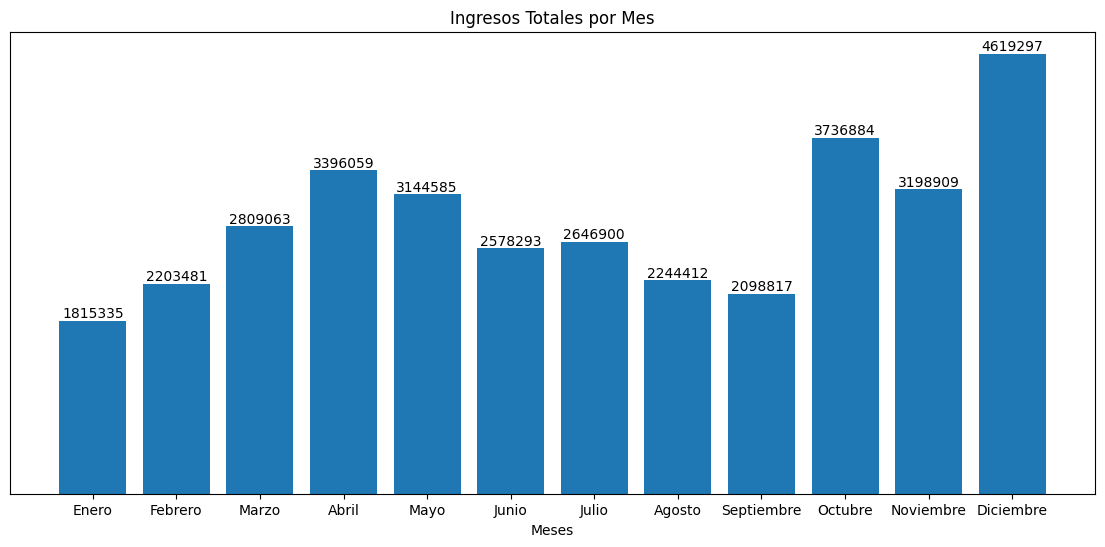

In [92]:
# Datos para los ingresos totales por mes
ingreso_total_por_mes = []

for mes in meses:
    if mes in dataframes:
        df = dataframes[mes]
        ingreso_total = (df['Cantidad Pedida']*df['Precio Unitario']).sum()
        ingreso_total_por_mes.append(ingreso_total)
    else:
        ingreso_total_por_mes.append(0)

# Crear el gráfico de barras para ingresos totales por mes
plt.figure(figsize=(14, 6))
bars = plt.bar(meses, ingreso_total_por_mes)
plt.title('Ingresos Totales por Mes')
plt.xlabel('Meses')
plt.ylabel('Ingresos')
plt.grid(False)

# AgregaMos etiquetas de valor en la parte superior de cada barra
for bar, ingreso in zip(bars, ingreso_total_por_mes):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{ingreso:.0f}', ha='center', va='bottom')

# Eliminar los números del eje y
plt.gca().axes.get_yaxis().set_visible(False)

# Mostrar el gráfico
plt.show()

# 2. Optimización de la publicidad y patrón de ventas por hora:

# ¿Cuál es el momento ideal del día para presentar la publicidad y aumentar la probabilidad de compra?

##ENERO

###Optimización de la publicidad y patrón de ventas por hora según el mes

In [118]:
ruta_de_acceso = '/content/drive/MyDrive/UNI/Big Data/Clase 3/Dataset_de_ventas_Enero.csv'

df_ventas_enero = pd.read_csv(ruta_de_acceso)

df_ventas_enero

,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
9718,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
9719,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
9720,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
9721,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"


In [119]:
# Transformo todos los valores no numericos en Nan en las columnas Cantidad Pedida y Precio Unitario
df_ventas_enero['Cantidad Pedida'] = pd.to_numeric(df_ventas_enero['Cantidad Pedida'], errors='coerce')  #El errors= 'coerce' transforma los valores no numericos a NaN'
df_ventas_enero['Precio Unitario'] = pd.to_numeric(df_ventas_enero['Precio Unitario'], errors='coerce')

# Elimino todos los Nan y me quedo solo con los valores numericos
df_ventas_enero = df_ventas_enero.dropna()

# Transformo todos los valores numericos al tipo de dato int
df_ventas_enero['Cantidad Pedida'] = df_ventas_enero['Cantidad Pedida'].astype(int)
df_ventas_enero['Precio Unitario'] = df_ventas_enero['Precio Unitario'].astype(float)

#Transformo los valores de fecha y hora a un formato que se pueda analizar

df_ventas_enero['Fecha de compra'] = pd.to_datetime(df_ventas_enero['Fecha de Pedido'])

def extraer_datos(datos):
  datos['Hora'] = datos['Fecha de compra'].dt.hour

  return datos

df_ventas_enero = extraer_datos(df_ventas_enero)

df_ventas_enero

<ipython-input-119-77222350bcc7>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-119-77222350bcc7>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-119-77222350bcc7>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-119-7

,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Fecha de compra,Hora
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",2019-01-22 21:25:00,21
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",2019-01-28 14:15:00,14
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",2019-01-17 13:33:00,13
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",2019-01-05 20:33:00,20
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",2019-01-25 11:59:00,11
...,...,...,...,...,...,...,...,...
9718,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001",2019-01-26 19:09:00,19
9719,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016",2019-01-10 22:58:00,22
9720,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035",2019-01-21 14:31:00,14
9721,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001",2019-01-15 14:21:00,14


In [120]:
horas = list(range(24))
ventas_por_hora = df_ventas_enero.groupby('Hora')['Cantidad Pedida'].sum()

#Crear el objeto figura
fig = go.Figure()

fig.add_trace(go.Scatter(
        x = horas,
        y= ventas_por_hora,
        name = 'Ventas por hora',
        line = dict(color= 'Red'),

        )
)

fig.update_layout(
    title = 'Unidades Vendidas por hora - Enero',
    xaxis = dict(title='Hora', tickvals=horas),
    yaxis = dict(title='Unidades Vendidas',side='left'),


)

###Distribución de ventas por ubicación según el mes

In [121]:
#Separo los datos de la direccion y creo un dataframe nuevo

df_direccion = df_ventas_enero['Dirección de Envio'].str.split(', ', expand = True)
df_direccion.columns = ['Calle', 'Ciudad', 'PO BOX']
df_direccion[['Estado', 'Cod Postal']] = df_direccion['PO BOX'].str.split(' ', expand = True)
df_ventas_enero_desglosado = pd.concat([df_ventas_enero, df_direccion], axis = True)
df_ventas_enero_desglosado

,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Fecha de compra,Hora,Calle,Ciudad,PO BOX,Estado,Cod Postal
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",2019-01-22 21:25:00,21,944 Walnut St,Boston,MA 02215,MA,02215
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",2019-01-28 14:15:00,14,185 Maple St,Portland,OR 97035,OR,97035
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",2019-01-17 13:33:00,13,538 Adams St,San Francisco,CA 94016,CA,94016
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",2019-01-05 20:33:00,20,738 10th St,Los Angeles,CA 90001,CA,90001
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",2019-01-25 11:59:00,11,387 10th St,Austin,TX 73301,TX,73301
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9718,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001",2019-01-26 19:09:00,19,95 8th St,Dallas,TX 75001,TX,75001
9719,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016",2019-01-10 22:58:00,22,403 7th St,San Francisco,CA 94016,CA,94016
9720,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035",2019-01-21 14:31:00,14,214 Main St,Portland,OR 97035,OR,97035
9721,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001",2019-01-15 14:21:00,14,810 2nd St,Los Angeles,CA 90001,CA,90001


In [122]:
#Cálculo de las ventas por Estado

ventas_por_estado = df_ventas_enero_desglosado.groupby('Estado')['Cantidad Pedida'].sum()
ventas_por_estado = ventas_por_estado.reset_index(inplace = False)
ventas_por_estado

,Estado,Cantidad Pedida
0,CA,4364
1,GA,877
2,MA,1171
3,ME,138
4,NY,1497
5,OR,553
6,TX,1459
7,WA,809


In [123]:
#Muestro las ventas según el Estado

fig = px.choropleth(ventas_por_estado, locations = 'Estado', locationmode = 'USA-states', color = 'Cantidad Pedida',
                    color_continuous_scale = 'RdYlGn',
                    scope = "usa",
                    title = 'Ventas por Estado'
)

fig.show()

###Análisis del producto más vendido según el mes

In [124]:
#Agrupo los productos

Productos_vendidos_enero= df_ventas_enero.groupby('Producto')['Cantidad Pedida'].sum()
Productos_vendidos_enero_ordenados = Productos_vendidos_enero.sort_values(ascending = False)

df_Productos = pd.DataFrame({'Producto':Productos_vendidos_enero_ordenados.index, 'Cantidad Pedida': Productos_vendidos_enero_ordenados.values})

Productos_vendidos_enero_ordenados.values

array([1596, 1425, 1284, 1151, 1081,  814,  659,  419,  379,  318,  314,
        312,  243,  235,  217,  215,  125,   42,   39])

In [125]:
#Muestro el producto más vendido en diciembre

Productos = df_Productos['Producto']
Unidades = df_Productos['Cantidad Pedida']

#Creo el objeto figura
fig = go.Figure()

#Agrego grafico en mi objeto figura
fig.add_trace(go.Bar(
        x = Productos,
        y= Unidades,
        name = 'Unidades Vendidas - Enero',
        marker = dict(color= 'light blue')
)
)

##FEBRERO

###Optimización de la publicidad y patrón de ventas por hora según el mes

In [126]:
ruta_de_acceso = '/content/drive/MyDrive/UNI/Big Data/Clase 3/Dataset_de_ventas_Febrero.csv'

df_ventas_febrero = pd.read_csv(ruta_de_acceso)

df_ventas_febrero

,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"
...,...,...,...,...,...,...
12031,162004,Apple Airpods Headphones,1,150,02/12/19 22:02,"227 Church St, San Francisco, CA 94016"
12032,162005,AAA Batteries (4-pack),2,2.99,02/04/19 20:44,"417 Jefferson St, Los Angeles, CA 90001"
12033,162006,USB-C Charging Cable,1,11.95,02/24/19 06:31,"498 8th St, Atlanta, GA 30301"
12034,162007,USB-C Charging Cable,1,11.95,02/24/19 19:09,"715 7th St, Dallas, TX 75001"


In [127]:
# Transformo todos los valores no numericos en Nan en las columnas Cantidad Pedida y Precio Unitario
df_ventas_febrero['Cantidad Pedida'] = pd.to_numeric(df_ventas_febrero['Cantidad Pedida'], errors='coerce')  #El errors= 'coerce' transforma los valores no numericos a NaN'
df_ventas_febrero['Precio Unitario'] = pd.to_numeric(df_ventas_febrero['Precio Unitario'], errors='coerce')

# Elimino todos los Nan y me quedo solo con los valores numericos
df_ventas_febrero = df_ventas_febrero.dropna()

# Transformo todos los valores numericos al tipo de dato int
df_ventas_febrero['Cantidad Pedida'] = df_ventas_febrero['Cantidad Pedida'].astype(int)
df_ventas_febrero['Precio Unitario'] = df_ventas_febrero['Precio Unitario'].astype(float)

<ipython-input-127-1ead21b95f3c>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-127-1ead21b95f3c>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [128]:
#Transformo los valores de fecha y hora a un formato que se pueda analizar

df_ventas_febrero['Fecha de compra'] = pd.to_datetime(df_ventas_febrero['Fecha de Pedido'])

df_ventas_febrero

<ipython-input-128-59a3c64673b6>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Fecha de compra
0,150502,iPhone,1,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",2019-02-18 01:35:00
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",2019-02-13 07:24:00
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",2019-02-18 09:46:00
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",2019-02-02 16:47:00
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",2019-02-28 20:32:00
...,...,...,...,...,...,...,...
12031,162004,Apple Airpods Headphones,1,150.00,02/12/19 22:02,"227 Church St, San Francisco, CA 94016",2019-02-12 22:02:00
12032,162005,AAA Batteries (4-pack),2,2.99,02/04/19 20:44,"417 Jefferson St, Los Angeles, CA 90001",2019-02-04 20:44:00
12033,162006,USB-C Charging Cable,1,11.95,02/24/19 06:31,"498 8th St, Atlanta, GA 30301",2019-02-24 06:31:00
12034,162007,USB-C Charging Cable,1,11.95,02/24/19 19:09,"715 7th St, Dallas, TX 75001",2019-02-24 19:09:00


In [129]:
def extraer_datos(datos):
  datos['Hora'] = datos['Fecha de compra'].dt.hour

  return datos

df_ventas_febrero = extraer_datos(df_ventas_febrero)

df_ventas_febrero

<ipython-input-129-5eca9da29cfa>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Fecha de compra,Hora
0,150502,iPhone,1,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",2019-02-18 01:35:00,1
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",2019-02-13 07:24:00,7
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",2019-02-18 09:46:00,9
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",2019-02-02 16:47:00,16
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",2019-02-28 20:32:00,20
...,...,...,...,...,...,...,...,...
12031,162004,Apple Airpods Headphones,1,150.00,02/12/19 22:02,"227 Church St, San Francisco, CA 94016",2019-02-12 22:02:00,22
12032,162005,AAA Batteries (4-pack),2,2.99,02/04/19 20:44,"417 Jefferson St, Los Angeles, CA 90001",2019-02-04 20:44:00,20
12033,162006,USB-C Charging Cable,1,11.95,02/24/19 06:31,"498 8th St, Atlanta, GA 30301",2019-02-24 06:31:00,6
12034,162007,USB-C Charging Cable,1,11.95,02/24/19 19:09,"715 7th St, Dallas, TX 75001",2019-02-24 19:09:00,19


In [130]:
horas = list(range(24))
ventas_por_hora = df_ventas_febrero.groupby('Hora')['Cantidad Pedida'].sum()

#Crear el objeto figura
fig = go.Figure()

fig.add_trace(go.Scatter(
        x = horas,
        y= ventas_por_hora,
        name = 'Ventas por hora',
        line = dict(color= 'Red'),

        )
)

fig.update_layout(
    title = 'Unidades Vendidas por hora - Febrero',
    xaxis = dict(title='Hora', tickvals=horas),
    yaxis = dict(title='Unidades Vendidas',side='left'),


)

###Distribución de ventas por ubicación según el mes

In [131]:
#Separo los datos de la direccion y creo un dataframe nuevo

df_direccion = df_ventas_febrero['Dirección de Envio'].str.split(', ', expand = True)
df_direccion.columns = ['Calle', 'Ciudad', 'PO BOX']
df_direccion[['Estado', 'Cod Postal']] = df_direccion['PO BOX'].str.split(' ', expand = True)
df_ventas_febrero_desglosado = pd.concat([df_ventas_febrero, df_direccion], axis = True)
df_ventas_febrero_desglosado

,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Fecha de compra,Hora,Calle,Ciudad,PO BOX,Estado,Cod Postal
0,150502,iPhone,1,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",2019-02-18 01:35:00,1,866 Spruce St,Portland,ME 04101,ME,04101
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",2019-02-13 07:24:00,7,18 13th St,San Francisco,CA 94016,CA,94016
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",2019-02-18 09:46:00,9,52 6th St,New York City,NY 10001,NY,10001
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",2019-02-02 16:47:00,16,129 Cherry St,Atlanta,GA 30301,GA,30301
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",2019-02-28 20:32:00,20,548 Lincoln St,Seattle,WA 98101,WA,98101
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12031,162004,Apple Airpods Headphones,1,150.00,02/12/19 22:02,"227 Church St, San Francisco, CA 94016",2019-02-12 22:02:00,22,227 Church St,San Francisco,CA 94016,CA,94016
12032,162005,AAA Batteries (4-pack),2,2.99,02/04/19 20:44,"417 Jefferson St, Los Angeles, CA 90001",2019-02-04 20:44:00,20,417 Jefferson St,Los Angeles,CA 90001,CA,90001
12033,162006,USB-C Charging Cable,1,11.95,02/24/19 06:31,"498 8th St, Atlanta, GA 30301",2019-02-24 06:31:00,6,498 8th St,Atlanta,GA 30301,GA,30301
12034,162007,USB-C Charging Cable,1,11.95,02/24/19 19:09,"715 7th St, Dallas, TX 75001",2019-02-24 19:09:00,19,715 7th St,Dallas,TX 75001,TX,75001


In [132]:
#Cálculo de las ventas por Estado

ventas_por_estado = df_ventas_febrero_desglosado.groupby('Estado')['Cantidad Pedida'].sum()
ventas_por_estado = ventas_por_estado.reset_index(inplace = False)
ventas_por_estado

,Estado,Cantidad Pedida
0,CA,5412
1,GA,1042
2,MA,1401
3,ME,208
4,NY,1807
5,OR,730
6,TX,1795
7,WA,1066


In [133]:
#Muestro las ventas según el Estado

fig = px.choropleth(ventas_por_estado, locations = 'Estado', locationmode = 'USA-states', color = 'Cantidad Pedida',
                    color_continuous_scale = 'RdYlGn',
                    scope = "usa",
                    title = 'Ventas por Estado'
)

fig.show()

###Análisis del producto más vendido según el mes

In [134]:
#Agrupo los productos

Productos_vendidos_febrero= df_ventas_febrero.groupby('Producto')['Cantidad Pedida'].sum()
Productos_vendidos_febrero_ordenados = Productos_vendidos_febrero.sort_values(ascending = False)

df_Productos = pd.DataFrame({'Producto':Productos_vendidos_febrero_ordenados.index, 'Cantidad Pedida': Productos_vendidos_febrero_ordenados.values})

Productos_vendidos_febrero_ordenados.values

array([1975, 1736, 1654, 1497, 1282, 1013,  844,  475,  439,  428,  418,
        381,  314,  277,  275,  246,  129,   40,   38])

In [135]:
#Muestro el producto más vendido en diciembre

Productos = df_Productos['Producto']
Unidades = df_Productos['Cantidad Pedida']

#Creo el objeto figura
fig = go.Figure()

#Agrego grafico en mi objeto figura
fig.add_trace(go.Bar(
        x = Productos,
        y= Unidades,
        name = 'Unidades Vendidas - Febrero',
        marker = dict(color= 'light blue')
)
)

##MARZO

###Optimización de la publicidad y patrón de ventas por hora según el mes

In [136]:
ruta_de_acceso = '/content/drive/MyDrive/UNI/Big Data/Clase 3/Dataset_de_ventas_Marzo.csv'

df_ventas_marzo = pd.read_csv(ruta_de_acceso)

df_ventas_marzo

,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"
...,...,...,...,...,...,...
15221,176554,Lightning Charging Cable,1,14.95,03/24/19 11:14,"672 12th St, San Francisco, CA 94016"
15222,176555,27in FHD Monitor,1,149.99,03/22/19 20:27,"42 4th St, San Francisco, CA 94016"
15223,176556,AAA Batteries (4-pack),3,2.99,03/14/19 10:29,"871 7th St, Los Angeles, CA 90001"
15224,176557,iPhone,1,700,03/30/19 12:32,"83 Washington St, San Francisco, CA 94016"


In [137]:
# Transformo todos los valores no numericos en Nan en las columnas Cantidad Pedida y Precio Unitario
df_ventas_marzo['Cantidad Pedida'] = pd.to_numeric(df_ventas_marzo['Cantidad Pedida'], errors='coerce')  #El errors= 'coerce' transforma los valores no numericos a NaN'
df_ventas_marzo['Precio Unitario'] = pd.to_numeric(df_ventas_marzo['Precio Unitario'], errors='coerce')

# Elimino todos los Nan y me quedo solo con los valores numericos
df_ventas_marzo = df_ventas_marzo.dropna()

# Transformo todos los valores numericos al tipo de dato int
df_ventas_marzo['Cantidad Pedida'] = df_ventas_marzo['Cantidad Pedida'].astype(int)
df_ventas_marzo['Precio Unitario'] = df_ventas_marzo['Precio Unitario'].astype(float)

<ipython-input-137-776d90942d5e>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-137-776d90942d5e>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [138]:
#Transformo los valores de fecha y hora a un formato que se pueda analizar

df_ventas_marzo['Fecha de compra'] = pd.to_datetime(df_ventas_marzo['Fecha de Pedido'])

df_ventas_marzo

<ipython-input-138-7728766d4874>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Fecha de compra
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",2019-03-28 20:59:00
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",2019-03-28 20:59:00
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",2019-03-28 20:59:00
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",2019-03-17 05:39:00
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",2019-03-10 00:01:00
...,...,...,...,...,...,...,...
15221,176554,Lightning Charging Cable,1,14.95,03/24/19 11:14,"672 12th St, San Francisco, CA 94016",2019-03-24 11:14:00
15222,176555,27in FHD Monitor,1,149.99,03/22/19 20:27,"42 4th St, San Francisco, CA 94016",2019-03-22 20:27:00
15223,176556,AAA Batteries (4-pack),3,2.99,03/14/19 10:29,"871 7th St, Los Angeles, CA 90001",2019-03-14 10:29:00
15224,176557,iPhone,1,700.00,03/30/19 12:32,"83 Washington St, San Francisco, CA 94016",2019-03-30 12:32:00


In [139]:
def extraer_datos(datos):
  datos['Hora'] = datos['Fecha de compra'].dt.hour

  return datos

df_ventas_marzo = extraer_datos(df_ventas_marzo)

df_ventas_marzo

<ipython-input-139-647919c401a7>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Fecha de compra,Hora
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",2019-03-28 20:59:00,20
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",2019-03-28 20:59:00,20
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",2019-03-28 20:59:00,20
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",2019-03-17 05:39:00,5
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",2019-03-10 00:01:00,0
...,...,...,...,...,...,...,...,...
15221,176554,Lightning Charging Cable,1,14.95,03/24/19 11:14,"672 12th St, San Francisco, CA 94016",2019-03-24 11:14:00,11
15222,176555,27in FHD Monitor,1,149.99,03/22/19 20:27,"42 4th St, San Francisco, CA 94016",2019-03-22 20:27:00,20
15223,176556,AAA Batteries (4-pack),3,2.99,03/14/19 10:29,"871 7th St, Los Angeles, CA 90001",2019-03-14 10:29:00,10
15224,176557,iPhone,1,700.00,03/30/19 12:32,"83 Washington St, San Francisco, CA 94016",2019-03-30 12:32:00,12


In [140]:
horas = list(range(24))
ventas_por_hora = df_ventas_marzo.groupby('Hora')['Cantidad Pedida'].sum()

#Crear el objeto figura
fig = go.Figure()

fig.add_trace(go.Scatter(
        x = horas,
        y= ventas_por_hora,
        name = 'Ventas por hora',
        line = dict(color= 'Red'),

        )
)

fig.update_layout(
    title = 'Unidades Vendidas por hora - Marzo',
    xaxis = dict(title='Hora', tickvals=horas),
    yaxis = dict(title='Unidades Vendidas',side='left'),


)

###Distribución de ventas por ubicación según el mes

In [141]:
#Separo los datos de la direccion y creo un dataframe nuevo

df_direccion = df_ventas_marzo['Dirección de Envio'].str.split(', ', expand = True)
df_direccion.columns = ['Calle', 'Ciudad', 'PO BOX']
df_direccion[['Estado', 'Cod Postal']] = df_direccion['PO BOX'].str.split(' ', expand = True)
df_ventas_marzo_desglosado = pd.concat([df_ventas_marzo, df_direccion], axis = True)
df_ventas_marzo_desglosado

,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Fecha de compra,Hora,Calle,Ciudad,PO BOX,Estado,Cod Postal
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",2019-03-28 20:59:00,20,942 Church St,Austin,TX 73301,TX,73301
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",2019-03-28 20:59:00,20,942 Church St,Austin,TX 73301,TX,73301
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",2019-03-28 20:59:00,20,942 Church St,Austin,TX 73301,TX,73301
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",2019-03-17 05:39:00,5,261 10th St,San Francisco,CA 94016,CA,94016
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",2019-03-10 00:01:00,0,764 13th St,San Francisco,CA 94016,CA,94016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15221,176554,Lightning Charging Cable,1,14.95,03/24/19 11:14,"672 12th St, San Francisco, CA 94016",2019-03-24 11:14:00,11,672 12th St,San Francisco,CA 94016,CA,94016
15222,176555,27in FHD Monitor,1,149.99,03/22/19 20:27,"42 4th St, San Francisco, CA 94016",2019-03-22 20:27:00,20,42 4th St,San Francisco,CA 94016,CA,94016
15223,176556,AAA Batteries (4-pack),3,2.99,03/14/19 10:29,"871 7th St, Los Angeles, CA 90001",2019-03-14 10:29:00,10,871 7th St,Los Angeles,CA 90001,CA,90001
15224,176557,iPhone,1,700.00,03/30/19 12:32,"83 Washington St, San Francisco, CA 94016",2019-03-30 12:32:00,12,83 Washington St,San Francisco,CA 94016,CA,94016


In [142]:
#Cálculo de las ventas por Estado

ventas_por_estado = df_ventas_marzo_desglosado.groupby('Estado')['Cantidad Pedida'].sum()
ventas_por_estado = ventas_por_estado.reset_index(inplace = False)
ventas_por_estado

,Estado,Cantidad Pedida
0,CA,6773
1,GA,1385
2,MA,1884
3,ME,214
4,NY,2215
5,OR,901
6,TX,2301
7,WA,1333


In [143]:
#Muestro las ventas según el Estado

fig = px.choropleth(ventas_por_estado, locations = 'Estado', locationmode = 'USA-states', color = 'Cantidad Pedida',
                    color_continuous_scale = 'RdYlGn',
                    scope = "usa",
                    title = 'Ventas por Estado'
)

fig.show()

###Análisis del producto más vendido según el mes

In [144]:
#Agrupo los productos

Productos_vendidos_marzo= df_ventas_marzo.groupby('Producto')['Cantidad Pedida'].sum()
Productos_vendidos_marzo_ordenados = Productos_vendidos_marzo.sort_values(ascending = False)

df_Productos = pd.DataFrame({'Producto':Productos_vendidos_marzo_ordenados.index, 'Cantidad Pedida': Productos_vendidos_marzo_ordenados.values})

Productos_vendidos_marzo_ordenados.values

array([2478, 2216, 1944, 1875, 1662, 1321, 1197,  609,  538,  524,  479,
        463,  380,  362,  344,  326,  174,   64,   50])

In [145]:
#Muestro el producto más vendido en diciembre

Productos = df_Productos['Producto']
Unidades = df_Productos['Cantidad Pedida']

#Creo el objeto figura
fig = go.Figure()

#Agrego grafico en mi objeto figura
fig.add_trace(go.Bar(
        x = Productos,
        y= Unidades,
        name = 'Unidades Vendidas - Marzo',
        marker = dict(color= 'light blue')
)
)

##ABRIL

###Optimización de la publicidad y patrón de ventas por hora según el mes

In [146]:
ruta_de_acceso = '/content/drive/MyDrive/UNI/Big Data/Clase 3/Dataset_de_ventas_Abril.csv'

df_ventas_abril = pd.read_csv(ruta_de_acceso)

df_ventas_abril

,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


In [147]:
# Transformo todos los valores no numericos en Nan en las columnas Cantidad Pedida y Precio Unitario
df_ventas_abril['Cantidad Pedida'] = pd.to_numeric(df_ventas_abril['Cantidad Pedida'], errors='coerce')  #El errors= 'coerce' transforma los valores no numericos a NaN'
df_ventas_abril['Precio Unitario'] = pd.to_numeric(df_ventas_abril['Precio Unitario'], errors='coerce')

# Elimino todos los Nan y me quedo solo con los valores numericos
df_ventas_abril = df_ventas_abril.dropna()

# Transformo todos los valores numericos al tipo de dato int
df_ventas_abril['Cantidad Pedida'] = df_ventas_abril['Cantidad Pedida'].astype(int)
df_ventas_abril['Precio Unitario'] = df_ventas_abril['Precio Unitario'].astype(float)

<ipython-input-147-b6f0efb6358d>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-147-b6f0efb6358d>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [148]:
#Transformo los valores de fecha y hora a un formato que se pueda analizar

df_ventas_abril['Fecha de compra'] = pd.to_datetime(df_ventas_abril['Fecha de Pedido'])

df_ventas_abril

<ipython-input-148-87f34ef311d6>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Fecha de compra
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019-04-30 09:27:00
...,...,...,...,...,...,...,...
18378,194090,Google Phone,1,600.00,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001",2019-04-08 17:11:00
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301",2019-04-15 16:02:00
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016",2019-04-28 14:36:00
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035",2019-04-14 15:09:00


In [149]:
def extraer_datos(datos):
  datos['Hora'] = datos['Fecha de compra'].dt.hour

  return datos

df_ventas_abril = extraer_datos(df_ventas_abril)

df_ventas_abril

<ipython-input-149-a287373f307e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Fecha de compra,Hora
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019-04-30 09:27:00,9
...,...,...,...,...,...,...,...,...
18378,194090,Google Phone,1,600.00,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001",2019-04-08 17:11:00,17
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301",2019-04-15 16:02:00,16
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016",2019-04-28 14:36:00,14
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035",2019-04-14 15:09:00,15


In [150]:
horas = list(range(24))
ventas_por_hora = df_ventas_abril.groupby('Hora')['Cantidad Pedida'].sum()

#Crear el objeto figura
fig = go.Figure()

fig.add_trace(go.Scatter(
        x = horas,
        y= ventas_por_hora,
        name = 'Ventas por hora',
        line = dict(color= 'Red'),

        )
)

fig.update_layout(
    title = 'Unidades Vendidas por hora - Abril',
    xaxis = dict(title='Hora', tickvals=horas),
    yaxis = dict(title='Unidades Vendidas',side='left'),


)

###Distribución de ventas por ubicación según el mes

In [151]:
#Separo los datos de la direccion y creo un dataframe nuevo

df_direccion = df_ventas_abril['Dirección de Envio'].str.split(', ', expand = True)
df_direccion.columns = ['Calle', 'Ciudad', 'PO BOX']
df_direccion[['Estado', 'Cod Postal']] = df_direccion['PO BOX'].str.split(' ', expand = True)
df_ventas_abril_desglosado = pd.concat([df_ventas_abril, df_direccion], axis = True)
df_ventas_abril_desglosado

,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Fecha de compra,Hora,Calle,Ciudad,PO BOX,Estado,Cod Postal
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00,8,917 1st St,Dallas,TX 75001,TX,75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00,22,682 Chestnut St,Boston,MA 02215,MA,02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,14,669 Spruce St,Los Angeles,CA 90001,CA,90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,14,669 Spruce St,Los Angeles,CA 90001,CA,90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019-04-30 09:27:00,9,333 8th St,Los Angeles,CA 90001,CA,90001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18378,194090,Google Phone,1,600.00,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001",2019-04-08 17:11:00,17,177 Jackson St,Los Angeles,CA 90001,CA,90001
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301",2019-04-15 16:02:00,16,311 Forest St,Austin,TX 73301,TX,73301
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016",2019-04-28 14:36:00,14,347 Sunset St,San Francisco,CA 94016,CA,94016
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035",2019-04-14 15:09:00,15,835 Lake St,Portland,OR 97035,OR,97035


In [152]:
#Cálculo de las ventas por Estado

ventas_por_estado = df_ventas_abril_desglosado.groupby('Estado')['Cantidad Pedida'].sum()
ventas_por_estado = ventas_por_estado.reset_index(inplace = False)
ventas_por_estado

,Estado,Cantidad Pedida
0,CA,8386
1,GA,1633
2,MA,2190
3,ME,265
4,NY,2741
5,OR,1134
6,TX,2611
7,WA,1608


In [153]:
#Muestro las ventas según el Estado

fig = px.choropleth(ventas_por_estado, locations = 'Estado', locationmode = 'USA-states', color = 'Cantidad Pedida',
                    color_continuous_scale = 'RdYlGn',
                    scope = "usa",
                    title = 'Ventas por Estado'
)

fig.show()

###Análisis del producto más vendido según el mes

In [154]:
#Agrupo los productos

Productos_vendidos_abril= df_ventas_abril.groupby('Producto')['Cantidad Pedida'].sum()
Productos_vendidos_abril_ordenados = Productos_vendidos_abril.sort_values(ascending = False)

df_Productos = pd.DataFrame({'Producto':Productos_vendidos_abril_ordenados.index, 'Cantidad Pedida': Productos_vendidos_abril_ordenados.values})

Productos_vendidos_abril_ordenados.values

array([2936, 2822, 2371, 2270, 2066, 1525, 1288,  737,  695,  653,  581,
        565,  459,  455,  395,  392,  220,   77,   61])

In [155]:
#Muestro el producto más vendido en diciembre

Productos = df_Productos['Producto']
Unidades = df_Productos['Cantidad Pedida']

#Creo el objeto figura
fig = go.Figure()

#Agrego grafico en mi objeto figura
fig.add_trace(go.Bar(
        x = Productos,
        y= Unidades,
        name = 'Unidades Vendidas - Abril',
        marker = dict(color= 'light blue')
)
)

##MAYO

###Optimización de la publicidad y patrón de ventas por hora según el mes

In [156]:
ruta_de_acceso = '/content/drive/MyDrive/UNI/Big Data/Clase 3/Dataset_de_ventas_Mayo.csv'

df_ventas_mayo = pd.read_csv(ruta_de_acceso)

df_ventas_mayo

,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"
...,...,...,...,...,...,...
16630,209916,Bose SoundSport Headphones,1,99.99,05/08/19 19:15,"235 Center St, Seattle, WA 98101"
16631,209917,Wired Headphones,1,11.99,05/24/19 22:02,"926 9th St, San Francisco, CA 94016"
16632,209918,AAA Batteries (4-pack),2,2.99,05/24/19 17:44,"868 Hickory St, Boston, MA 02215"
16633,209919,USB-C Charging Cable,1,11.95,05/04/19 12:46,"204 Adams St, Seattle, WA 98101"


In [157]:
# Transformo todos los valores no numericos en Nan en las columnas Cantidad Pedida y Precio Unitario
df_ventas_mayo['Cantidad Pedida'] = pd.to_numeric(df_ventas_mayo['Cantidad Pedida'], errors='coerce')  #El errors= 'coerce' transforma los valores no numericos a NaN'
df_ventas_mayo['Precio Unitario'] = pd.to_numeric(df_ventas_mayo['Precio Unitario'], errors='coerce')

# Elimino todos los Nan y me quedo solo con los valores numericos
df_ventas_mayo = df_ventas_mayo.dropna()

# Transformo todos los valores numericos al tipo de dato int
df_ventas_mayo['Cantidad Pedida'] = df_ventas_mayo['Cantidad Pedida'].astype(int)
df_ventas_mayo['Precio Unitario'] = df_ventas_mayo['Precio Unitario'].astype(float)

<ipython-input-157-2f1d09a20bbc>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-157-2f1d09a20bbc>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [158]:
#Transformo los valores de fecha y hora a un formato que se pueda analizar

df_ventas_mayo['Fecha de compra'] = pd.to_datetime(df_ventas_mayo['Fecha de Pedido'])

df_ventas_mayo

<ipython-input-158-9f78b70c3510>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Fecha de compra
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",2019-05-16 17:14:00
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",2019-05-19 14:43:00
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",2019-05-24 11:36:00
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",2019-05-02 20:40:00
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",2019-05-11 22:55:00
...,...,...,...,...,...,...,...
16630,209916,Bose SoundSport Headphones,1,99.99,05/08/19 19:15,"235 Center St, Seattle, WA 98101",2019-05-08 19:15:00
16631,209917,Wired Headphones,1,11.99,05/24/19 22:02,"926 9th St, San Francisco, CA 94016",2019-05-24 22:02:00
16632,209918,AAA Batteries (4-pack),2,2.99,05/24/19 17:44,"868 Hickory St, Boston, MA 02215",2019-05-24 17:44:00
16633,209919,USB-C Charging Cable,1,11.95,05/04/19 12:46,"204 Adams St, Seattle, WA 98101",2019-05-04 12:46:00


In [159]:
def extraer_datos(datos):
  datos['Hora'] = datos['Fecha de compra'].dt.hour

  return datos

df_ventas_mayo = extraer_datos(df_ventas_mayo)

df_ventas_mayo

<ipython-input-159-c38a2b027227>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Fecha de compra,Hora
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",2019-05-16 17:14:00,17
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",2019-05-19 14:43:00,14
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",2019-05-24 11:36:00,11
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",2019-05-02 20:40:00,20
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",2019-05-11 22:55:00,22
...,...,...,...,...,...,...,...,...
16630,209916,Bose SoundSport Headphones,1,99.99,05/08/19 19:15,"235 Center St, Seattle, WA 98101",2019-05-08 19:15:00,19
16631,209917,Wired Headphones,1,11.99,05/24/19 22:02,"926 9th St, San Francisco, CA 94016",2019-05-24 22:02:00,22
16632,209918,AAA Batteries (4-pack),2,2.99,05/24/19 17:44,"868 Hickory St, Boston, MA 02215",2019-05-24 17:44:00,17
16633,209919,USB-C Charging Cable,1,11.95,05/04/19 12:46,"204 Adams St, Seattle, WA 98101",2019-05-04 12:46:00,12


In [160]:
horas = list(range(24))
ventas_por_hora = df_ventas_mayo.groupby('Hora')['Cantidad Pedida'].sum()

#Crear el objeto figura
fig = go.Figure()

fig.add_trace(go.Scatter(
        x = horas,
        y= ventas_por_hora,
        name = 'Ventas por hora',
        line = dict(color= 'Red'),

        )
)

fig.update_layout(
    title = 'Unidades Vendidas por hora - Mayo',
    xaxis = dict(title='Hora', tickvals=horas),
    yaxis = dict(title='Unidades Vendidas',side='left'),


)

###Distribución de ventas por ubicación según el mes

In [161]:
#Separo los datos de la direccion y creo un dataframe nuevo

df_direccion = df_ventas_mayo['Dirección de Envio'].str.split(', ', expand = True)
df_direccion.columns = ['Calle', 'Ciudad', 'PO BOX']
df_direccion[['Estado', 'Cod Postal']] = df_direccion['PO BOX'].str.split(' ', expand = True)
df_ventas_mayo_desglosado = pd.concat([df_ventas_mayo, df_direccion], axis = True)
df_ventas_mayo_desglosado

,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Fecha de compra,Hora,Calle,Ciudad,PO BOX,Estado,Cod Postal
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",2019-05-16 17:14:00,17,669 2nd St,New York City,NY 10001,NY,10001
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",2019-05-19 14:43:00,14,844 Walnut St,Dallas,TX 75001,TX,75001
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",2019-05-24 11:36:00,11,164 Madison St,New York City,NY 10001,NY,10001
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",2019-05-02 20:40:00,20,622 Meadow St,Dallas,TX 75001,TX,75001
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",2019-05-11 22:55:00,22,17 Church St,Seattle,WA 98101,WA,98101
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16630,209916,Bose SoundSport Headphones,1,99.99,05/08/19 19:15,"235 Center St, Seattle, WA 98101",2019-05-08 19:15:00,19,235 Center St,Seattle,WA 98101,WA,98101
16631,209917,Wired Headphones,1,11.99,05/24/19 22:02,"926 9th St, San Francisco, CA 94016",2019-05-24 22:02:00,22,926 9th St,San Francisco,CA 94016,CA,94016
16632,209918,AAA Batteries (4-pack),2,2.99,05/24/19 17:44,"868 Hickory St, Boston, MA 02215",2019-05-24 17:44:00,17,868 Hickory St,Boston,MA 02215,MA,02215
16633,209919,USB-C Charging Cable,1,11.95,05/04/19 12:46,"204 Adams St, Seattle, WA 98101",2019-05-04 12:46:00,12,204 Adams St,Seattle,WA 98101,WA,98101


In [162]:
#Cálculo de las ventas por Estado

ventas_por_estado = df_ventas_mayo_desglosado.groupby('Estado')['Cantidad Pedida'].sum()
ventas_por_estado = ventas_por_estado.reset_index(inplace = False)
ventas_por_estado

,Estado,Cantidad Pedida
0,CA,7321
1,GA,1506
2,MA,1985
3,ME,241
4,NY,2556
5,OR,1067
6,TX,2577
7,WA,1404


In [163]:
#Muestro las ventas según el Estado

fig = px.choropleth(ventas_por_estado, locations = 'Estado', locationmode = 'USA-states', color = 'Cantidad Pedida',
                    color_continuous_scale = 'RdYlGn',
                    scope = "usa",
                    title = 'Ventas por Estado'
)

fig.show()

###Análisis del producto más vendido según el mes

In [164]:
#Agrupo los productos

Productos_vendidos_mayo= df_ventas_mayo.groupby('Producto')['Cantidad Pedida'].sum()
Productos_vendidos_mayo_ordenados = Productos_vendidos_mayo.sort_values(ascending = False)

df_Productos = pd.DataFrame({'Producto':Productos_vendidos_mayo_ordenados.index, 'Cantidad Pedida': Productos_vendidos_mayo_ordenados.values})

Productos_vendidos_mayo_ordenados.values

array([2931, 2383, 2077, 2069, 1875, 1359, 1174,  688,  639,  544,  542,
        480,  463,  399,  368,  340,  186,   76,   64])

In [165]:
#Muestro el producto más vendido en diciembre

Productos = df_Productos['Producto']
Unidades = df_Productos['Cantidad Pedida']

#Creo el objeto figura
fig = go.Figure()

#Agrego grafico en mi objeto figura
fig.add_trace(go.Bar(
        x = Productos,
        y= Unidades,
        name = 'Unidades Vendidas - Mayo',
        marker = dict(color= 'light blue')
)
)

##JUNIO

###Optimización de la publicidad y patrón de ventas por hora según el mes

In [166]:
ruta_de_acceso = '/content/drive/MyDrive/UNI/Big Data/Clase 3/Dataset_de_ventas_Junio.csv'

df_ventas_junio = pd.read_csv(ruta_de_acceso)

df_ventas_junio

,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"
...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [167]:
# Transformo todos los valores no numericos en Nan en las columnas Cantidad Pedida y Precio Unitario
df_ventas_junio['Cantidad Pedida'] = pd.to_numeric(df_ventas_junio['Cantidad Pedida'], errors='coerce')  #El errors= 'coerce' transforma los valores no numericos a NaN'
df_ventas_junio['Precio Unitario'] = pd.to_numeric(df_ventas_junio['Precio Unitario'], errors='coerce')

# Elimino todos los Nan y me quedo solo con los valores numericos
df_ventas_junio = df_ventas_junio.dropna()

# Transformo todos los valores numericos al tipo de dato int
df_ventas_junio['Cantidad Pedida'] = df_ventas_junio['Cantidad Pedida'].astype(int)
df_ventas_junio['Precio Unitario'] = df_ventas_junio['Precio Unitario'].astype(float)

<ipython-input-167-b867a087dead>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-167-b867a087dead>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [168]:
#Transformo los valores de fecha y hora a un formato que se pueda analizar

df_ventas_junio['Fecha de compra'] = pd.to_datetime(df_ventas_junio['Fecha de Pedido'])

df_ventas_junio

<ipython-input-168-12cc6acc82f9>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Fecha de compra
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",2019-06-23 19:34:00
1,209922,Macbook Pro Laptop,1,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",2019-06-30 10:05:00
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",2019-06-24 20:18:00
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",2019-06-05 10:21:00
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",2019-06-25 18:58:00
...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",2019-06-07 19:02:00
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",2019-06-01 19:29:00
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",2019-06-22 18:57:00
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",2019-06-26 18:35:00


In [169]:
def extraer_datos(datos):
  datos['Hora'] = datos['Fecha de compra'].dt.hour

  return datos

df_ventas_junio = extraer_datos(df_ventas_junio)

df_ventas_junio

<ipython-input-169-1ec2175fa9d0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Fecha de compra,Hora
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",2019-06-23 19:34:00,19
1,209922,Macbook Pro Laptop,1,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",2019-06-30 10:05:00,10
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",2019-06-24 20:18:00,20
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",2019-06-05 10:21:00,10
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",2019-06-25 18:58:00,18
...,...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",2019-06-07 19:02:00,19
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",2019-06-01 19:29:00,19
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",2019-06-22 18:57:00,18
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",2019-06-26 18:35:00,18


In [170]:
horas = list(range(24))
ventas_por_hora = df_ventas_junio.groupby('Hora')['Cantidad Pedida'].sum()

#Crear el objeto figura
fig = go.Figure()

fig.add_trace(go.Scatter(
        x = horas,
        y= ventas_por_hora,
        name = 'Ventas por hora',
        line = dict(color= 'Red'),

        )
)

fig.update_layout(
    title = 'Unidades Vendidas por hora - Junio',
    xaxis = dict(title='Hora', tickvals=horas),
    yaxis = dict(title='Unidades Vendidas',side='left'),


)

###Distribución de ventas por ubicación según el mes

In [171]:
#Separo los datos de la direccion y creo un dataframe nuevo

df_direccion = df_ventas_junio['Dirección de Envio'].str.split(', ', expand = True)
df_direccion.columns = ['Calle', 'Ciudad', 'PO BOX']
df_direccion[['Estado', 'Cod Postal']] = df_direccion['PO BOX'].str.split(' ', expand = True)
df_ventas_junio_desglosado = pd.concat([df_ventas_junio, df_direccion], axis = True)
df_ventas_junio_desglosado

,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Fecha de compra,Hora,Calle,Ciudad,PO BOX,Estado,Cod Postal
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",2019-06-23 19:34:00,19,950 Walnut St,Portland,ME 04101,ME,04101
1,209922,Macbook Pro Laptop,1,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",2019-06-30 10:05:00,10,80 4th St,San Francisco,CA 94016,CA,94016
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",2019-06-24 20:18:00,20,402 Jackson St,Los Angeles,CA 90001,CA,90001
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",2019-06-05 10:21:00,10,560 10th St,Seattle,WA 98101,WA,98101
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",2019-06-25 18:58:00,18,545 2nd St,San Francisco,CA 94016,CA,94016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",2019-06-07 19:02:00,19,795 Pine St,Boston,MA 02215,MA,02215
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",2019-06-01 19:29:00,19,495 North St,New York City,NY 10001,NY,10001
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",2019-06-22 18:57:00,18,319 Ridge St,San Francisco,CA 94016,CA,94016
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",2019-06-26 18:35:00,18,916 Main St,San Francisco,CA 94016,CA,94016


In [172]:
#Cálculo de las ventas por Estado

ventas_por_estado = df_ventas_junio_desglosado.groupby('Estado')['Cantidad Pedida'].sum()
ventas_por_estado = ventas_por_estado.reset_index(inplace = False)
ventas_por_estado

,Estado,Cantidad Pedida
0,CA,6138
1,GA,1226
2,MA,1616
3,ME,231
4,NY,2001
5,OR,850
6,TX,1995
7,WA,1198


In [173]:
#Muestro las ventas según el Estado

fig = px.choropleth(ventas_por_estado, locations = 'Estado', locationmode = 'USA-states', color = 'Cantidad Pedida',
                    color_continuous_scale = 'RdYlGn',
                    scope = "usa",
                    title = 'Ventas por Estado'
)

fig.show()

###Análisis del producto más vendido según el mes

In [174]:
#Agrupo los productos

Productos_vendidos_junio= df_ventas_junio.groupby('Producto')['Cantidad Pedida'].sum()
Productos_vendidos_junio_ordenados = Productos_vendidos_junio.sort_values(ascending = False)

df_Productos = pd.DataFrame({'Producto':Productos_vendidos_junio_ordenados.index, 'Cantidad Pedida': Productos_vendidos_junio_ordenados.values})

Productos_vendidos_junio_ordenados.values

array([2160, 2095, 1688, 1676, 1476, 1167,  984,  568,  532,  454,  452,
        391,  367,  356,  321,  315,  155,   55,   43])

In [175]:
#Muestro el producto más vendido en diciembre

Productos = df_Productos['Producto']
Unidades = df_Productos['Cantidad Pedida']

#Creo el objeto figura
fig = go.Figure()

#Agrego grafico en mi objeto figura
fig.add_trace(go.Bar(
        x = Productos,
        y= Unidades,
        name = 'Unidades Vendidas - Junio',
        marker = dict(color= 'light blue')
)
)

##JULIO

###Optimización de la publicidad y patrón de ventas por hora según el mes

In [176]:
ruta_de_acceso = '/content/drive/MyDrive/UNI/Big Data/Clase 3/Dataset_de_ventas_Julio.csv'

df_ventas_julio = pd.read_csv(ruta_de_acceso)

df_ventas_julio

,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"
...,...,...,...,...,...,...
14366,236665,Wired Headphones,1,11.99,07/20/19 16:16,"694 Meadow St, Atlanta, GA 30301"
14367,236666,20in Monitor,1,109.99,07/31/19 20:11,"866 14th St, San Francisco, CA 94016"
14368,236667,AAA Batteries (4-pack),1,2.99,07/17/19 22:29,"249 Cherry St, Dallas, TX 75001"
14369,236668,Wired Headphones,1,11.99,07/30/19 19:28,"727 Wilson St, Austin, TX 73301"


In [177]:
# Transformo todos los valores no numericos en Nan en las columnas Cantidad Pedida y Precio Unitario
df_ventas_julio['Cantidad Pedida'] = pd.to_numeric(df_ventas_julio['Cantidad Pedida'], errors='coerce')  #El errors= 'coerce' transforma los valores no numericos a NaN'
df_ventas_julio['Precio Unitario'] = pd.to_numeric(df_ventas_julio['Precio Unitario'], errors='coerce')

# Elimino todos los Nan y me quedo solo con los valores numericos
df_ventas_julio = df_ventas_julio.dropna()

# Transformo todos los valores numericos al tipo de dato int
df_ventas_julio['Cantidad Pedida'] = df_ventas_julio['Cantidad Pedida'].astype(int)
df_ventas_julio['Precio Unitario'] = df_ventas_julio['Precio Unitario'].astype(float)

<ipython-input-177-8388dbb9f779>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-177-8388dbb9f779>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [178]:
#Transformo los valores de fecha y hora a un formato que se pueda analizar

df_ventas_julio['Fecha de compra'] = pd.to_datetime(df_ventas_julio['Fecha de Pedido'])

df_ventas_julio

<ipython-input-178-136eb35a2a98>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Fecha de compra
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",2019-07-26 16:51:00
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",2019-07-05 08:55:00
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",2019-07-29 12:41:00
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",2019-07-28 10:15:00
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",2019-07-31 02:13:00
...,...,...,...,...,...,...,...
14366,236665,Wired Headphones,1,11.99,07/20/19 16:16,"694 Meadow St, Atlanta, GA 30301",2019-07-20 16:16:00
14367,236666,20in Monitor,1,109.99,07/31/19 20:11,"866 14th St, San Francisco, CA 94016",2019-07-31 20:11:00
14368,236667,AAA Batteries (4-pack),1,2.99,07/17/19 22:29,"249 Cherry St, Dallas, TX 75001",2019-07-17 22:29:00
14369,236668,Wired Headphones,1,11.99,07/30/19 19:28,"727 Wilson St, Austin, TX 73301",2019-07-30 19:28:00


In [179]:
def extraer_datos(datos):
  datos['Hora'] = datos['Fecha de compra'].dt.hour

  return datos

df_ventas_julio = extraer_datos(df_ventas_julio)

df_ventas_julio

<ipython-input-179-cc9680254682>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Fecha de compra,Hora
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",2019-07-26 16:51:00,16
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",2019-07-05 08:55:00,8
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",2019-07-29 12:41:00,12
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",2019-07-28 10:15:00,10
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",2019-07-31 02:13:00,2
...,...,...,...,...,...,...,...,...
14366,236665,Wired Headphones,1,11.99,07/20/19 16:16,"694 Meadow St, Atlanta, GA 30301",2019-07-20 16:16:00,16
14367,236666,20in Monitor,1,109.99,07/31/19 20:11,"866 14th St, San Francisco, CA 94016",2019-07-31 20:11:00,20
14368,236667,AAA Batteries (4-pack),1,2.99,07/17/19 22:29,"249 Cherry St, Dallas, TX 75001",2019-07-17 22:29:00,22
14369,236668,Wired Headphones,1,11.99,07/30/19 19:28,"727 Wilson St, Austin, TX 73301",2019-07-30 19:28:00,19


In [180]:
horas = list(range(24))
ventas_por_hora = df_ventas_julio.groupby('Hora')['Cantidad Pedida'].sum()

#Crear el objeto figura
fig = go.Figure()

fig.add_trace(go.Scatter(
        x = horas,
        y= ventas_por_hora,
        name = 'Ventas por hora',
        line = dict(color= 'Red'),

        )
)

fig.update_layout(
    title = 'Unidades Vendidas por hora - Julio',
    xaxis = dict(title='Hora', tickvals=horas),
    yaxis = dict(title='Unidades Vendidas',side='left'),


)

###Distribución de ventas por ubicación según el mes

In [181]:
#Separo los datos de la direccion y creo un dataframe nuevo

df_direccion = df_ventas_julio['Dirección de Envio'].str.split(', ', expand = True)
df_direccion.columns = ['Calle', 'Ciudad', 'PO BOX']
df_direccion[['Estado', 'Cod Postal']] = df_direccion['PO BOX'].str.split(' ', expand = True)
df_ventas_julio_desglosado = pd.concat([df_ventas_julio, df_direccion], axis = True)
df_ventas_julio_desglosado

,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Fecha de compra,Hora,Calle,Ciudad,PO BOX,Estado,Cod Postal
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",2019-07-26 16:51:00,16,389 South St,Atlanta,GA 30301,GA,30301
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",2019-07-05 08:55:00,8,590 4th St,Seattle,WA 98101,WA,98101
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",2019-07-29 12:41:00,12,861 Hill St,Atlanta,GA 30301,GA,30301
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",2019-07-28 10:15:00,10,190 Ridge St,Atlanta,GA 30301,GA,30301
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",2019-07-31 02:13:00,2,824 Forest St,Seattle,WA 98101,WA,98101
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14366,236665,Wired Headphones,1,11.99,07/20/19 16:16,"694 Meadow St, Atlanta, GA 30301",2019-07-20 16:16:00,16,694 Meadow St,Atlanta,GA 30301,GA,30301
14367,236666,20in Monitor,1,109.99,07/31/19 20:11,"866 14th St, San Francisco, CA 94016",2019-07-31 20:11:00,20,866 14th St,San Francisco,CA 94016,CA,94016
14368,236667,AAA Batteries (4-pack),1,2.99,07/17/19 22:29,"249 Cherry St, Dallas, TX 75001",2019-07-17 22:29:00,22,249 Cherry St,Dallas,TX 75001,TX,75001
14369,236668,Wired Headphones,1,11.99,07/30/19 19:28,"727 Wilson St, Austin, TX 73301",2019-07-30 19:28:00,19,727 Wilson St,Austin,TX 73301,TX,73301


In [182]:
#Cálculo de las ventas por Estado

ventas_por_estado = df_ventas_julio_desglosado.groupby('Estado')['Cantidad Pedida'].sum()
ventas_por_estado = ventas_por_estado.reset_index(inplace = False)
ventas_por_estado

,Estado,Cantidad Pedida
0,CA,6498
1,GA,1259
2,MA,1771
3,ME,219
4,NY,2169
5,OR,808
6,TX,2080
7,WA,1265


In [183]:
#Muestro las ventas según el Estado

fig = px.choropleth(ventas_por_estado, locations = 'Estado', locationmode = 'USA-states', color = 'Cantidad Pedida',
                    color_continuous_scale = 'RdYlGn',
                    scope = "usa",
                    title = 'Ventas por Estado'
)

fig.show()

###Análisis del producto más vendido según el mes

In [184]:
#Agrupo los productos

Productos_vendidos_julio= df_ventas_julio.groupby('Producto')['Cantidad Pedida'].sum()
Productos_vendidos_julio_ordenados = Productos_vendidos_julio.sort_values(ascending = False)

df_Productos = pd.DataFrame({'Producto':Productos_vendidos_julio_ordenados.index, 'Cantidad Pedida': Productos_vendidos_julio_ordenados.values})

Productos_vendidos_julio_ordenados.values

array([2366, 2072, 1847, 1812, 1563, 1221, 1060,  605,  503,  483,  462,
        411,  399,  368,  327,  318,  145,   55,   52])

In [185]:
#Muestro el producto más vendido en diciembre

Productos = df_Productos['Producto']
Unidades = df_Productos['Cantidad Pedida']

#Creo el objeto figura
fig = go.Figure()

#Agrego grafico en mi objeto figura
fig.add_trace(go.Bar(
        x = Productos,
        y= Unidades,
        name = 'Unidades Vendidas - Julio',
        marker = dict(color= 'light blue')
)
)

##AGOSTO

###Optimización de la publicidad y patrón de ventas por hora según el mes

In [186]:
ruta_de_acceso = '/content/drive/MyDrive/UNI/Big Data/Clase 3/Dataset_de_ventas_Agosto.csv'

df_ventas_agosto = pd.read_csv(ruta_de_acceso)

df_ventas_agosto

,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
12006,248146,Bose SoundSport Headphones,1,99.99,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016"
12007,248147,AAA Batteries (4-pack),3,2.99,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215"
12008,248148,AA Batteries (4-pack),1,3.84,08/02/19 07:25,"568 13th St, Seattle, WA 98101"
12009,248149,USB-C Charging Cable,1,11.95,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016"


In [187]:
# Transformo todos los valores no numericos en Nan en las columnas Cantidad Pedida y Precio Unitario
df_ventas_agosto['Cantidad Pedida'] = pd.to_numeric(df_ventas_agosto['Cantidad Pedida'], errors='coerce')  #El errors= 'coerce' transforma los valores no numericos a NaN'
df_ventas_agosto['Precio Unitario'] = pd.to_numeric(df_ventas_agosto['Precio Unitario'], errors='coerce')

# Elimino todos los Nan y me quedo solo con los valores numericos
df_ventas_agosto = df_ventas_agosto.dropna()

# Transformo todos los valores numericos al tipo de dato int
df_ventas_agosto['Cantidad Pedida'] = df_ventas_agosto['Cantidad Pedida'].astype(int)
df_ventas_agosto['Precio Unitario'] = df_ventas_agosto['Precio Unitario'].astype(float)

<ipython-input-187-30f91860c744>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-187-30f91860c744>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [188]:
#Transformo los valores de fecha y hora a un formato que se pueda analizar

df_ventas_agosto['Fecha de compra'] = pd.to_datetime(df_ventas_agosto['Fecha de Pedido'])

df_ventas_agosto

<ipython-input-188-c9dc3d554beb>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Fecha de compra
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",2019-08-31 22:21:00
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",2019-08-15 15:11:00
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",2019-08-06 14:40:00
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",2019-08-29 20:59:00
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",2019-08-15 19:53:00
...,...,...,...,...,...,...,...
12006,248146,Bose SoundSport Headphones,1,99.99,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016",2019-08-29 22:19:00
12007,248147,AAA Batteries (4-pack),3,2.99,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215",2019-08-31 16:26:00
12008,248148,AA Batteries (4-pack),1,3.84,08/02/19 07:25,"568 13th St, Seattle, WA 98101",2019-08-02 07:25:00
12009,248149,USB-C Charging Cable,1,11.95,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016",2019-08-08 12:10:00


In [189]:
def extraer_datos(datos):
  datos['Hora'] = datos['Fecha de compra'].dt.hour

  return datos

df_ventas_agosto = extraer_datos(df_ventas_agosto)

df_ventas_agosto

<ipython-input-189-904439149f00>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Fecha de compra,Hora
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",2019-08-31 22:21:00,22
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",2019-08-15 15:11:00,15
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",2019-08-06 14:40:00,14
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",2019-08-29 20:59:00,20
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",2019-08-15 19:53:00,19
...,...,...,...,...,...,...,...,...
12006,248146,Bose SoundSport Headphones,1,99.99,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016",2019-08-29 22:19:00,22
12007,248147,AAA Batteries (4-pack),3,2.99,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215",2019-08-31 16:26:00,16
12008,248148,AA Batteries (4-pack),1,3.84,08/02/19 07:25,"568 13th St, Seattle, WA 98101",2019-08-02 07:25:00,7
12009,248149,USB-C Charging Cable,1,11.95,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016",2019-08-08 12:10:00,12


In [190]:
horas = list(range(24))
ventas_por_hora = df_ventas_agosto.groupby('Hora')['Cantidad Pedida'].sum()

#Crear el objeto figura
fig = go.Figure()

fig.add_trace(go.Scatter(
        x = horas,
        y= ventas_por_hora,
        name = 'Ventas por hora',
        line = dict(color= 'Red'),

        )
)

fig.update_layout(
    title = 'Unidades Vendidas por hora - Agosto',
    xaxis = dict(title='Hora', tickvals=horas),
    yaxis = dict(title='Unidades Vendidas',side='left'),


)

###Distribución de ventas por ubicación según el mes

In [191]:
#Separo los datos de la direccion y creo un dataframe nuevo

df_direccion = df_ventas_agosto['Dirección de Envio'].str.split(', ', expand = True)
df_direccion.columns = ['Calle', 'Ciudad', 'PO BOX']
df_direccion[['Estado', 'Cod Postal']] = df_direccion['PO BOX'].str.split(' ', expand = True)
df_ventas_agosto_desglosado = pd.concat([df_ventas_agosto, df_direccion], axis = True)
df_ventas_agosto_desglosado

,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Fecha de compra,Hora,Calle,Ciudad,PO BOX,Estado,Cod Postal
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",2019-08-31 22:21:00,22,359 Spruce St,Seattle,WA 98101,WA,98101
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",2019-08-15 15:11:00,15,492 Ridge St,Dallas,TX 75001,TX,75001
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",2019-08-06 14:40:00,14,149 7th St,Portland,OR 97035,OR,97035
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",2019-08-29 20:59:00,20,631 2nd St,Los Angeles,CA 90001,CA,90001
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",2019-08-15 19:53:00,19,736 14th St,New York City,NY 10001,NY,10001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12006,248146,Bose SoundSport Headphones,1,99.99,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016",2019-08-29 22:19:00,22,868 Hickory St,San Francisco,CA 94016,CA,94016
12007,248147,AAA Batteries (4-pack),3,2.99,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215",2019-08-31 16:26:00,16,206 Lakeview St,Boston,MA 02215,MA,02215
12008,248148,AA Batteries (4-pack),1,3.84,08/02/19 07:25,"568 13th St, Seattle, WA 98101",2019-08-02 07:25:00,7,568 13th St,Seattle,WA 98101,WA,98101
12009,248149,USB-C Charging Cable,1,11.95,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016",2019-08-08 12:10:00,12,495 Walnut St,San Francisco,CA 94016,CA,94016


In [192]:
#Cálculo de las ventas por Estado

ventas_por_estado = df_ventas_agosto_desglosado.groupby('Estado')['Cantidad Pedida'].sum()
ventas_por_estado = ventas_por_estado.reset_index(inplace = False)
ventas_por_estado

,Estado,Cantidad Pedida
0,CA,5264
1,GA,1053
2,MA,1409
3,ME,181
4,NY,1804
5,OR,746
6,TX,1837
7,WA,1148


In [193]:
#Muestro las ventas según el Estado

fig = px.choropleth(ventas_por_estado, locations = 'Estado', locationmode = 'USA-states', color = 'Cantidad Pedida',
                    color_continuous_scale = 'RdYlGn',
                    scope = "usa",
                    title = 'Ventas por Estado'
)

fig.show()

###Análisis del producto más vendido según el mes

In [194]:
#Agrupo los productos

Productos_vendidos_agosto= df_ventas_agosto.groupby('Producto')['Cantidad Pedida'].sum()
Productos_vendidos_agosto_ordenados = Productos_vendidos_agosto.sort_values(ascending = False)

df_Productos = pd.DataFrame({'Producto':Productos_vendidos_agosto_ordenados.index, 'Cantidad Pedida': Productos_vendidos_agosto_ordenados.values})

Productos_vendidos_agosto_ordenados.values

array([2019, 1826, 1462, 1441, 1290, 1010,  880,  492,  439,  438,  381,
        360,  331,  299,  275,  262,  143,   48,   46])

In [195]:
#Muestro el producto más vendido en diciembre

Productos = df_Productos['Producto']
Unidades = df_Productos['Cantidad Pedida']

#Creo el objeto figura
fig = go.Figure()

#Agrego grafico en mi objeto figura
fig.add_trace(go.Bar(
        x = Productos,
        y= Unidades,
        name = 'Unidades Vendidas - Agosto',
        marker = dict(color= 'light blue')
)
)

fig.update_layout(
    title = 'Unidades Vendidas',
    xaxis = dict(title= 'Productos'),
    yaxis = dict(title= 'Unidades')
)

##SEPTIEMBRE

###Optimización de la publicidad y patrón de ventas por hora según el mes

In [196]:
ruta_de_acceso = '/content/drive/MyDrive/UNI/Big Data/Clase 3/Dataset_de_ventas_Septiembre.csv'

df_ventas_septiembre = pd.read_csv(ruta_de_acceso)

df_ventas_septiembre

,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [197]:
# Transformo todos los valores no numericos en Nan en las columnas Cantidad Pedida y Precio Unitario
df_ventas_septiembre['Cantidad Pedida'] = pd.to_numeric(df_ventas_septiembre['Cantidad Pedida'], errors='coerce')  #El errors= 'coerce' transforma los valores no numericos a NaN'
df_ventas_septiembre['Precio Unitario'] = pd.to_numeric(df_ventas_septiembre['Precio Unitario'], errors='coerce')

# Elimino todos los Nan y me quedo solo con los valores numericos
df_ventas_septiembre = df_ventas_septiembre.dropna()

# Transformo todos los valores numericos al tipo de dato int
df_ventas_septiembre['Cantidad Pedida'] = df_ventas_septiembre['Cantidad Pedida'].astype(int)
df_ventas_septiembre['Precio Unitario'] = df_ventas_septiembre['Precio Unitario'].astype(float)

<ipython-input-197-d547ebad9c8e>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-197-d547ebad9c8e>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [198]:
#Transformo los valores de fecha y hora a un formato que se pueda analizar

df_ventas_septiembre['Fecha de compra'] = pd.to_datetime(df_ventas_septiembre['Fecha de Pedido'])

df_ventas_septiembre

<ipython-input-198-556ffe0d1bcc>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Fecha de compra
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",2019-09-17 14:44:00
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",2019-09-29 10:19:00
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",2019-09-16 17:48:00
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",2019-09-27 07:52:00
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",2019-09-01 19:03:00
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",2019-09-17 20:56:00
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",2019-09-01 16:00:00
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",2019-09-23 07:39:00
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",2019-09-19 17:30:00


In [199]:
def extraer_datos(datos):
  datos['Hora'] = datos['Fecha de compra'].dt.hour

  return datos

df_ventas_septiembre = extraer_datos(df_ventas_septiembre)

df_ventas_septiembre

<ipython-input-199-07a79ec02b6d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Fecha de compra,Hora
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",2019-09-17 14:44:00,14
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",2019-09-29 10:19:00,10
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",2019-09-16 17:48:00,17
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",2019-09-27 07:52:00,7
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",2019-09-01 19:03:00,19
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",2019-09-17 20:56:00,20
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",2019-09-01 16:00:00,16
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",2019-09-23 07:39:00,7
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",2019-09-19 17:30:00,17


In [200]:
horas = list(range(24))
ventas_por_hora = df_ventas_septiembre.groupby('Hora')['Cantidad Pedida'].sum()

#Crear el objeto figura
fig = go.Figure()

fig.add_trace(go.Scatter(
        x = horas,
        y= ventas_por_hora,
        name = 'Ventas por hora',
        line = dict(color= 'Red'),

        )
)

fig.update_layout(
    title = 'Unidades Vendidas por hora - Septiembre',
    xaxis = dict(title='Hora', tickvals=horas),
    yaxis = dict(title='Unidades Vendidas',side='left'),


)

###Distribución de ventas por ubicación según el mes

In [201]:
#Separo los datos de la direccion y creo un dataframe nuevo

df_direccion = df_ventas_septiembre['Dirección de Envio'].str.split(', ', expand = True)
df_direccion.columns = ['Calle', 'Ciudad', 'PO BOX']
df_direccion[['Estado', 'Cod Postal']] = df_direccion['PO BOX'].str.split(' ', expand = True)
df_ventas_septiembre_desglosado = pd.concat([df_ventas_septiembre, df_direccion], axis = True)
df_ventas_septiembre_desglosado

,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Fecha de compra,Hora,Calle,Ciudad,PO BOX,Estado,Cod Postal
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",2019-09-17 14:44:00,14,380 North St,Los Angeles,CA 90001,CA,90001
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",2019-09-29 10:19:00,10,511 8th St,Austin,TX 73301,TX,73301
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",2019-09-16 17:48:00,17,151 Johnson St,Los Angeles,CA 90001,CA,90001
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",2019-09-27 07:52:00,7,355 Hickory St,Seattle,WA 98101,WA,98101
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",2019-09-01 19:03:00,19,125 5th St,Atlanta,GA 30301,GA,30301
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",2019-09-17 20:56:00,20,840 Highland St,Los Angeles,CA 90001,CA,90001
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",2019-09-01 16:00:00,16,216 Dogwood St,San Francisco,CA 94016,CA,94016
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",2019-09-23 07:39:00,7,220 12th St,San Francisco,CA 94016,CA,94016
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",2019-09-19 17:30:00,17,511 Forest St,San Francisco,CA 94016,CA,94016


In [202]:
#Cálculo de las ventas por Estado

ventas_por_estado = df_ventas_septiembre_desglosado.groupby('Estado')['Cantidad Pedida'].sum()
ventas_por_estado = ventas_por_estado.reset_index(inplace = False)
ventas_por_estado

,Estado,Cantidad Pedida
0,CA,5211
1,GA,1035
2,MA,1455
3,ME,161
4,NY,1711
5,OR,668
6,TX,1820
7,WA,1058


In [203]:
#Muestro las ventas según el Estado

fig = px.choropleth(ventas_por_estado, locations = 'Estado', locationmode = 'USA-states', color = 'Cantidad Pedida',
                    color_continuous_scale = 'RdYlGn',
                    scope = "usa",
                    title = 'Ventas por Estado'
)

fig.show()

###Análisis del producto más vendido según el mes

In [204]:
#Agrupo los productos

Productos_vendidos_septiembre= df_ventas_septiembre.groupby('Producto')['Cantidad Pedida'].sum()
Productos_vendidos_septiembre_ordenados = Productos_vendidos_septiembre.sort_values(ascending = False)

df_Productos = pd.DataFrame({'Producto':Productos_vendidos_septiembre_ordenados.index, 'Cantidad Pedida': Productos_vendidos_septiembre_ordenados.values})

Productos_vendidos_septiembre_ordenados.values

array([1927, 1773, 1594, 1433, 1302,  968,  830,  482,  398,  382,  378,
        342,  294,  288,  277,  249,  126,   46,   30])

In [205]:
#Muestro el producto más vendido en diciembre

Productos = df_Productos['Producto']
Unidades = df_Productos['Cantidad Pedida']

#Creo el objeto figura
fig = go.Figure()

#Agrego grafico en mi objeto figura
fig.add_trace(go.Bar(
        x = Productos,
        y= Unidades,
        name = 'Unidades Vendidas - Septiembre',
        marker = dict(color= 'light blue')
)
)

fig.update_layout(
    title = 'Unidades Vendidas',
    xaxis = dict(title= 'Productos'),
    yaxis = dict(title= 'Unidades')
)

##OCTUBRE

###Optimización de la publicidad y patrón de ventas por hora según el mes

In [206]:
ruta_de_acceso = '/content/drive/MyDrive/UNI/Big Data/Clase 3/Dataset_de_ventas_Octubre.csv'

df_ventas_octubre = pd.read_csv(ruta_de_acceso)

df_ventas_octubre

,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
20374,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016"
20375,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001"
20376,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016"
20377,278795,iPhone,1,700,10/31/19 17:21,"291 Hill St, Seattle, WA 98101"


In [207]:
# Transformo todos los valores no numericos en Nan en las columnas Cantidad Pedida y Precio Unitario
df_ventas_octubre['Cantidad Pedida'] = pd.to_numeric(df_ventas_octubre['Cantidad Pedida'], errors='coerce')  #El errors= 'coerce' transforma los valores no numericos a NaN'
df_ventas_octubre['Precio Unitario'] = pd.to_numeric(df_ventas_octubre['Precio Unitario'], errors='coerce')

# Elimino todos los Nan y me quedo solo con los valores numericos
df_ventas_octubre = df_ventas_octubre.dropna()

# Transformo todos los valores numericos al tipo de dato int
df_ventas_octubre['Cantidad Pedida'] = df_ventas_octubre['Cantidad Pedida'].astype(int)
df_ventas_octubre['Precio Unitario'] = df_ventas_octubre['Precio Unitario'].astype(float)

<ipython-input-207-74fe100abf0d>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-207-74fe100abf0d>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [208]:
#Transformo los valores de fecha y hora a un formato que se pueda analizar

df_ventas_octubre['Fecha de compra'] = pd.to_datetime(df_ventas_octubre['Fecha de Pedido'])

df_ventas_octubre

<ipython-input-208-9e1e727de7ac>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Fecha de compra
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",2019-10-28 10:56:00
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",2019-10-28 17:26:00
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",2019-10-24 17:20:00
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",2019-10-14 22:26:00
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",2019-10-07 16:10:00
...,...,...,...,...,...,...,...
20374,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016",2019-10-12 04:32:00
20375,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001",2019-10-28 22:00:00
20376,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016",2019-10-09 20:58:00
20377,278795,iPhone,1,700.00,10/31/19 17:21,"291 Hill St, Seattle, WA 98101",2019-10-31 17:21:00


In [209]:
def extraer_datos(datos):
  datos['Hora'] = datos['Fecha de compra'].dt.hour

  return datos

df_ventas_octubre = extraer_datos(df_ventas_octubre)

df_ventas_octubre

<ipython-input-209-50e8a601f363>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Fecha de compra,Hora
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",2019-10-28 10:56:00,10
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",2019-10-28 17:26:00,17
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",2019-10-24 17:20:00,17
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",2019-10-14 22:26:00,22
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",2019-10-07 16:10:00,16
...,...,...,...,...,...,...,...,...
20374,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016",2019-10-12 04:32:00,4
20375,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001",2019-10-28 22:00:00,22
20376,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016",2019-10-09 20:58:00,20
20377,278795,iPhone,1,700.00,10/31/19 17:21,"291 Hill St, Seattle, WA 98101",2019-10-31 17:21:00,17


In [210]:
horas = list(range(24))
ventas_por_hora = df_ventas_octubre.groupby('Hora')['Cantidad Pedida'].sum()

#Crear el objeto figura
fig = go.Figure()

fig.add_trace(go.Scatter(
        x = horas,
        y= ventas_por_hora,
        name = 'Ventas por hora',
        line = dict(color= 'Red'),

        )
)

fig.update_layout(
    title = 'Unidades Vendidas por hora - Octubre',
    xaxis = dict(title='Hora', tickvals=horas),
    yaxis = dict(title='Unidades Vendidas',side='left'),


)

###Distribución de ventas por ubicación según el mes

In [211]:
#Separo los datos de la direccion y creo un dataframe nuevo

df_direccion = df_ventas_octubre['Dirección de Envio'].str.split(', ', expand = True)
df_direccion.columns = ['Calle', 'Ciudad', 'PO BOX']
df_direccion[['Estado', 'Cod Postal']] = df_direccion['PO BOX'].str.split(' ', expand = True)
df_ventas_octubre_desglosado = pd.concat([df_ventas_octubre, df_direccion], axis = True)
df_ventas_octubre_desglosado

,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Fecha de compra,Hora,Calle,Ciudad,PO BOX,Estado,Cod Postal
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",2019-10-28 10:56:00,10,609 Cherry St,Dallas,TX 75001,TX,75001
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",2019-10-28 17:26:00,17,225 5th St,Los Angeles,CA 90001,CA,90001
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",2019-10-24 17:20:00,17,967 12th St,New York City,NY 10001,NY,10001
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",2019-10-14 22:26:00,22,628 Jefferson St,New York City,NY 10001,NY,10001
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",2019-10-07 16:10:00,16,534 14th St,Los Angeles,CA 90001,CA,90001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20374,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016",2019-10-12 04:32:00,4,920 Adams St,San Francisco,CA 94016,CA,94016
20375,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001",2019-10-28 22:00:00,22,161 Chestnut St,Los Angeles,CA 90001,CA,90001
20376,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016",2019-10-09 20:58:00,20,346 Spruce St,San Francisco,CA 94016,CA,94016
20377,278795,iPhone,1,700.00,10/31/19 17:21,"291 Hill St, Seattle, WA 98101",2019-10-31 17:21:00,17,291 Hill St,Seattle,WA 98101,WA,98101


In [212]:
#Cálculo de las ventas por Estado

ventas_por_estado = df_ventas_octubre_desglosado.groupby('Estado')['Cantidad Pedida'].sum()
ventas_por_estado = ventas_por_estado.reset_index(inplace = False)
ventas_por_estado

,Estado,Cantidad Pedida
0,CA,9027
1,GA,1796
2,MA,2445
3,ME,281
4,NY,2953
5,OR,1276
6,TX,3046
7,WA,1881


In [213]:
#Muestro las ventas según el Estado

fig = px.choropleth(ventas_por_estado, locations = 'Estado', locationmode = 'USA-states', color = 'Cantidad Pedida',
                    color_continuous_scale = 'RdYlGn',
                    scope = "usa",
                    title = 'Ventas por Estado'
)

fig.show()

###Análisis del producto más vendido según el mes

In [214]:
#Agrupo los productos

Productos_vendidos_octubre= df_ventas_octubre.groupby('Producto')['Cantidad Pedida'].sum()
Productos_vendidos_octubre_ordenados = Productos_vendidos_octubre.sort_values(ascending = False)

df_Productos = pd.DataFrame({'Producto':Productos_vendidos_octubre_ordenados.index, 'Cantidad Pedida': Productos_vendidos_octubre_ordenados.values})

Productos_vendidos_octubre_ordenados.values

array([3362, 2939, 2669, 2570, 2274, 1674, 1465,  792,  723,  716,  672,
        597,  525,  525,  460,  428,  203,   61,   50])

In [215]:
#Muestro el producto más vendido en diciembre

Productos = df_Productos['Producto']
Unidades = df_Productos['Cantidad Pedida']

#Creo el objeto figura
fig = go.Figure()

#Agrego grafico en mi objeto figura
fig.add_trace(go.Bar(
        x = Productos,
        y= Unidades,
        name = 'Unidades Vendidas - Octubre',
        marker = dict(color= 'light blue')
)
)

fig.update_layout(
    title = 'Unidades Vendidas',
    xaxis = dict(title= 'Productos'),
    yaxis = dict(title= 'Unidades')
)

##NOVIEMBRE

###Optimización de la publicidad y patrón de ventas por hora según el mes

In [216]:
ruta_de_acceso = '/content/drive/MyDrive/UNI/Big Data/Clase 3/Dataset_de_ventas_Noviembre.csv'

df_ventas_noviembre = pd.read_csv(ruta_de_acceso)

df_ventas_noviembre

,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"
...,...,...,...,...,...,...
17656,295660,AAA Batteries (4-pack),2,2.99,11/04/19 14:17,"574 4th St, Los Angeles, CA 90001"
17657,295661,USB-C Charging Cable,1,11.95,11/23/19 07:22,"359 1st St, Austin, TX 73301"
17658,295662,Lightning Charging Cable,1,14.95,11/13/19 16:12,"900 10th St, Boston, MA 02215"
17659,295663,AAA Batteries (4-pack),1,2.99,11/17/19 17:08,"592 Sunset St, Boston, MA 02215"


In [217]:
# Transformo todos los valores no numericos en Nan en las columnas Cantidad Pedida y Precio Unitario
df_ventas_noviembre['Cantidad Pedida'] = pd.to_numeric(df_ventas_noviembre['Cantidad Pedida'], errors='coerce')  #El errors= 'coerce' transforma los valores no numericos a NaN'
df_ventas_noviembre['Precio Unitario'] = pd.to_numeric(df_ventas_noviembre['Precio Unitario'], errors='coerce')

# Elimino todos los Nan y me quedo solo con los valores numericos
df_ventas_noviembre = df_ventas_noviembre.dropna()

# Transformo todos los valores numericos al tipo de dato int
df_ventas_noviembre['Cantidad Pedida'] = df_ventas_noviembre['Cantidad Pedida'].astype(int)
df_ventas_noviembre['Precio Unitario'] = df_ventas_noviembre['Precio Unitario'].astype(float)

<ipython-input-217-90e7e76e1a2a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-217-90e7e76e1a2a>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [218]:
#Transformo los valores de fecha y hora a un formato que se pueda analizar

df_ventas_noviembre['Fecha de compra'] = pd.to_datetime(df_ventas_noviembre['Fecha de Pedido'])

df_ventas_noviembre

<ipython-input-218-ce9e2b179988>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Fecha de compra
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",2019-11-21 09:54:00
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",2019-11-17 10:03:00
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",2019-11-19 14:56:00
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",2019-11-25 22:24:00
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",2019-11-09 13:56:00
...,...,...,...,...,...,...,...
17656,295660,AAA Batteries (4-pack),2,2.99,11/04/19 14:17,"574 4th St, Los Angeles, CA 90001",2019-11-04 14:17:00
17657,295661,USB-C Charging Cable,1,11.95,11/23/19 07:22,"359 1st St, Austin, TX 73301",2019-11-23 07:22:00
17658,295662,Lightning Charging Cable,1,14.95,11/13/19 16:12,"900 10th St, Boston, MA 02215",2019-11-13 16:12:00
17659,295663,AAA Batteries (4-pack),1,2.99,11/17/19 17:08,"592 Sunset St, Boston, MA 02215",2019-11-17 17:08:00


In [219]:
def extraer_datos(datos):
  datos['Hora'] = datos['Fecha de compra'].dt.hour

  return datos

df_ventas_noviembre = extraer_datos(df_ventas_noviembre)

df_ventas_noviembre

<ipython-input-219-81a62e91eb44>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Fecha de compra,Hora
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",2019-11-21 09:54:00,9
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",2019-11-17 10:03:00,10
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",2019-11-19 14:56:00,14
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",2019-11-25 22:24:00,22
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",2019-11-09 13:56:00,13
...,...,...,...,...,...,...,...,...
17656,295660,AAA Batteries (4-pack),2,2.99,11/04/19 14:17,"574 4th St, Los Angeles, CA 90001",2019-11-04 14:17:00,14
17657,295661,USB-C Charging Cable,1,11.95,11/23/19 07:22,"359 1st St, Austin, TX 73301",2019-11-23 07:22:00,7
17658,295662,Lightning Charging Cable,1,14.95,11/13/19 16:12,"900 10th St, Boston, MA 02215",2019-11-13 16:12:00,16
17659,295663,AAA Batteries (4-pack),1,2.99,11/17/19 17:08,"592 Sunset St, Boston, MA 02215",2019-11-17 17:08:00,17


In [220]:
noviembrehoras = list(range(24))
ventas_por_hora = df_ventas_noviembre.groupby('Hora')['Cantidad Pedida'].sum()

#Crear el objeto figura
fig = go.Figure()

fig.add_trace(go.Scatter(
        x = horas,
        y= ventas_por_hora,
        name = 'Ventas por hora',
        line = dict(color= 'Red'),

        )
)

fig.update_layout(
    title = 'Unidades Vendidas por hora - Noviembre',
    xaxis = dict(title='Hora', tickvals=horas),
    yaxis = dict(title='Unidades Vendidas',side='left'),


)

###Distribución de ventas por ubicación según el mes

In [221]:
#Separo los datos de la direccion y creo un dataframe nuevo

df_direccion = df_ventas_noviembre['Dirección de Envio'].str.split(', ', expand = True)
df_direccion.columns = ['Calle', 'Ciudad', 'PO BOX']
df_direccion[['Estado', 'Cod Postal']] = df_direccion['PO BOX'].str.split(' ', expand = True)
df_ventas_noviembre_desglosado = pd.concat([df_ventas_noviembre, df_direccion], axis = True)
df_ventas_noviembre_desglosado

,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Fecha de compra,Hora,Calle,Ciudad,PO BOX,Estado,Cod Postal
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",2019-11-21 09:54:00,9,46 Park St,New York City,NY 10001,NY,10001
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",2019-11-17 10:03:00,10,962 Hickory St,Austin,TX 73301,TX,73301
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",2019-11-19 14:56:00,14,464 Cherry St,Los Angeles,CA 90001,CA,90001
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",2019-11-25 22:24:00,22,649 10th St,Seattle,WA 98101,WA,98101
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",2019-11-09 13:56:00,13,522 Hill St,Boston,MA 02215,MA,02215
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17656,295660,AAA Batteries (4-pack),2,2.99,11/04/19 14:17,"574 4th St, Los Angeles, CA 90001",2019-11-04 14:17:00,14,574 4th St,Los Angeles,CA 90001,CA,90001
17657,295661,USB-C Charging Cable,1,11.95,11/23/19 07:22,"359 1st St, Austin, TX 73301",2019-11-23 07:22:00,7,359 1st St,Austin,TX 73301,TX,73301
17658,295662,Lightning Charging Cable,1,14.95,11/13/19 16:12,"900 10th St, Boston, MA 02215",2019-11-13 16:12:00,16,900 10th St,Boston,MA 02215,MA,02215
17659,295663,AAA Batteries (4-pack),1,2.99,11/17/19 17:08,"592 Sunset St, Boston, MA 02215",2019-11-17 17:08:00,17,592 Sunset St,Boston,MA 02215,MA,02215


In [222]:
#Cálculo de las ventas por Estado

ventas_por_estado = df_ventas_noviembre_desglosado.groupby('Estado')['Cantidad Pedida'].sum()
ventas_por_estado = ventas_por_estado.reset_index(inplace = False)
ventas_por_estado

,Estado,Cantidad Pedida
0,CA,7975
1,GA,1566
2,MA,2172
3,ME,259
4,NY,2650
5,OR,1063
6,TX,2542
7,WA,1581


In [223]:
#Muestro las ventas según el Estado

fig = px.choropleth(ventas_por_estado, locations = 'Estado', locationmode = 'USA-states', color = 'Cantidad Pedida',
                    color_continuous_scale = 'RdYlGn',
                    scope = "usa",
                    title = 'Ventas por Estado'
)

fig.show()

###Análisis del producto más vendido según el mes

In [224]:
#Agrupo los productos

Productos_vendidos_noviembre= df_ventas_noviembre.groupby('Producto')['Cantidad Pedida'].sum()
Productos_vendidos_noviembre_ordenados = Productos_vendidos_noviembre.sort_values(ascending = False)

df_Productos = pd.DataFrame({'Producto':Productos_vendidos_noviembre_ordenados.index, 'Cantidad Pedida': Productos_vendidos_noviembre_ordenados.values})

Productos_vendidos_noviembre_ordenados.values

array([3027, 2630, 2255, 2213, 1938, 1510, 1251,  718,  664,  578,  550,
        492,  461,  440,  421,  374,  177,   56,   53])

In [225]:
#Muestro el producto más vendido en diciembre

Productos = df_Productos['Producto']
Unidades = df_Productos['Cantidad Pedida']

#Creo el objeto figura
fig = go.Figure()

#Agrego grafico en mi objeto figura
fig.add_trace(go.Bar(
        x = Productos,
        y= Unidades,
        name = 'Unidades Vendidas - Noviembre',
        marker = dict(color= 'light blue')
)
)

fig.update_layout(
    title = 'Unidades Vendidas',
    xaxis = dict(title= 'Productos'),
    yaxis = dict(title= 'Unidades')
)

##DICIEMBRE

###Optimización de la publicidad y patrón de ventas por hora según el mes

In [226]:
ruta_de_acceso = '/content/drive/MyDrive/UNI/Big Data/Clase 3/Dataset_de_ventas_Diciembre.csv'

df_ventas_diciembre = pd.read_csv(ruta_de_acceso)

df_ventas_diciembre

,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [227]:
# Transformo todos los valores no numericos en Nan en las columnas Cantidad Pedida y Precio Unitario
df_ventas_diciembre['Cantidad Pedida'] = pd.to_numeric(df_ventas_diciembre['Cantidad Pedida'], errors='coerce')  #El errors= 'coerce' transforma los valores no numericos a NaN'
df_ventas_diciembre['Precio Unitario'] = pd.to_numeric(df_ventas_diciembre['Precio Unitario'], errors='coerce')

# Elimino todos los Nan y me quedo solo con los valores numericos
df_ventas_diciembre = df_ventas_diciembre.dropna()

# Transformo todos los valores numericos al tipo de dato int
df_ventas_diciembre['Cantidad Pedida'] = df_ventas_diciembre['Cantidad Pedida'].astype(int)
df_ventas_diciembre['Precio Unitario'] = df_ventas_diciembre['Precio Unitario'].astype(float)

<ipython-input-227-6bf0025e34db>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-227-6bf0025e34db>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [228]:
#Transformo los valores de fecha y hora a un formato que se pueda analizar

df_ventas_diciembre['Fecha de compra'] = pd.to_datetime(df_ventas_diciembre['Fecha de Pedido'])

df_ventas_diciembre

<ipython-input-228-862765e8802b>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Fecha de compra
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",2019-12-30 00:01:00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",2019-12-29 07:03:00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",2019-12-12 18:21:00
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",2019-12-22 15:13:00
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",2019-12-18 12:38:00
...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",2019-12-11 20:58:00
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",2019-12-01 12:01:00
25114,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",2019-12-09 06:43:00
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",2019-12-03 10:39:00


In [229]:
def extraer_datos(datos):
  datos['Hora'] = datos['Fecha de compra'].dt.hour

  return datos

df_ventas_diciembre = extraer_datos(df_ventas_diciembre)

df_ventas_diciembre

<ipython-input-229-180757f939da>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Fecha de compra,Hora
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",2019-12-30 00:01:00,0
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",2019-12-29 07:03:00,7
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",2019-12-12 18:21:00,18
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",2019-12-22 15:13:00,15
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",2019-12-18 12:38:00,12
...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",2019-12-11 20:58:00,20
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",2019-12-01 12:01:00,12
25114,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",2019-12-09 06:43:00,6
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",2019-12-03 10:39:00,10


In [230]:
horas = list(range(24))
ventas_por_hora = df_ventas_diciembre.groupby('Hora')['Cantidad Pedida'].sum()

#Crear el objeto figura
fig = go.Figure()

fig.add_trace(go.Scatter(
        x = horas,
        y= ventas_por_hora,
        name = 'Ventas por hora',
        line = dict(color= 'Red'),

        )
)

fig.update_layout(
    title = 'Unidades Vendidas por hora - Diciembre',
    xaxis = dict(title='Hora', tickvals=horas),
    yaxis = dict(title='Unidades Vendidas',side='left'),


)

###Distribución de ventas por ubicación según el mes

In [231]:
#Separo los datos de la direccion y creo un dataframe nuevo

df_direccion = df_ventas_diciembre['Dirección de Envio'].str.split(', ', expand = True)
df_direccion.columns = ['Calle', 'Ciudad', 'PO BOX']
df_direccion[['Estado', 'Cod Postal']] = df_direccion['PO BOX'].str.split(' ', expand = True)
df_ventas_diciembre_desglosado = pd.concat([df_ventas_diciembre, df_direccion], axis = True)
df_ventas_diciembre_desglosado

,ID de Pedido,Producto,Cantidad Pedida,Precio Unitario,Fecha de Pedido,Dirección de Envio,Fecha de compra,Hora,Calle,Ciudad,PO BOX,Estado,Cod Postal
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",2019-12-30 00:01:00,0,136 Church St,New York City,NY 10001,NY,10001
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",2019-12-29 07:03:00,7,562 2nd St,New York City,NY 10001,NY,10001
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",2019-12-12 18:21:00,18,277 Main St,New York City,NY 10001,NY,10001
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",2019-12-22 15:13:00,15,410 6th St,San Francisco,CA 94016,CA,94016
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",2019-12-18 12:38:00,12,43 Hill St,Atlanta,GA 30301,GA,30301
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",2019-12-11 20:58:00,20,14 Madison St,San Francisco,CA 94016,CA,94016
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",2019-12-01 12:01:00,12,549 Willow St,Los Angeles,CA 90001,CA,90001
25114,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",2019-12-09 06:43:00,6,273 Wilson St,Seattle,WA 98101,WA,98101
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",2019-12-03 10:39:00,10,778 River St,Dallas,TX 75001,TX,75001


In [232]:
#Cálculo de las ventas por Estado

ventas_por_estado = df_ventas_diciembre_desglosado.groupby('Estado')['Cantidad Pedida'].sum()
ventas_por_estado = ventas_por_estado.reset_index(inplace = False)
ventas_por_estado

,Estado,Cantidad Pedida
0,CA,11159
1,GA,2224
2,MA,3029
3,ME,352
4,NY,3828
5,OR,1507
6,TX,3820
7,WA,2202


In [233]:
#Muestro las ventas según el Estado

fig = px.choropleth(ventas_por_estado, locations = 'Estado', locationmode = 'USA-states', color = 'Cantidad Pedida',
                    color_continuous_scale = 'RdYlGn',
                    scope = "usa",
                    title = 'Ventas por Estado'
)

fig.show()

###Análisis del producto más vendido según el mes

In [234]:
#Agrupo los productos

Productos_vendidos_diciembre= df_ventas_diciembre.groupby('Producto')['Cantidad Pedida'].sum()
Productos_vendidos_diciembre_ordenados = Productos_vendidos_diciembre.sort_values(ascending = False)

df_Productos = pd.DataFrame({'Producto':Productos_vendidos_diciembre_ordenados.index, 'Cantidad Pedida': Productos_vendidos_diciembre_ordenados.values})

Productos_vendidos_diciembre_ordenados.values

array([4240, 3718, 3251, 3089, 2748, 2079, 1825,  965,  908,  861,  849,
        716,  665,  644,  571,  541,  285,   86,   80])

In [235]:
#Muestro el producto más vendido en diciembre

Productos = df_Productos['Producto']
Unidades = df_Productos['Cantidad Pedida']

#Creo el objeto figura
fig = go.Figure()

#Agrego grafico en mi objeto figura
fig.add_trace(go.Bar(
        x = Productos,
        y= Unidades,
        name = 'Unidades Vendidas - Diciembre',
        marker = dict(color= 'light blue')
)
)

fig.update_layout(
    title = 'Unidades Vendidas',
    xaxis = dict(title= 'Productos'),
    yaxis = dict(title= 'Unidades')
)

# ¿Cómo cambian los patrones de ventas por hora a lo largo del año?

In [243]:
#Transformo los valores de fecha y hora a un formato que se pueda analizar
df_ventas["Fecha de compra"] = pd.to_datetime(df_ventas["Fecha de Pedido"])
horas = list(range(24))
ventas_por_hora = df_ventas.groupby('Hora')['Cantidad Pedida'].sum()


# Crear el objeto figura
fig = go.Figure()


fig.add_trace(go.Scatter(
        x = horas,
        y= ventas_por_hora,
        name = 'Ventas por hora',
        line = dict(color= 'Red'),

        )
)

fig.update_layout(
    title = 'Unidades Vendidas por hora',
    xaxis = dict(title='Hora', tickvals=horas),
    yaxis = dict(title='Unidades Vendidas',side='left'),


)

# ¿Hay modificaciones en los patrones de ventas durante las horas de mayor actividad en los distintos meses?

In [244]:
ventas_por_dia = df_ventas.groupby('Dia')['Cantidad Pedida'].sum()
dias= list(ventas_por_dia.index)

# Crear el objeto figura
fig = go.Figure()


fig.add_trace(go.Scatter(
        x = dias,
        y= ventas_por_dia,
        name = 'Ventas por dia',
        line = dict(color= 'Red',shape='spline',smoothing=1.3,width=3),

        )
)

fig.update_layout(
    title = 'Unidades Vendidas por dia',
    xaxis = dict(title='Dias', tickvals=dias),
    yaxis = dict(title='Unidades Vendidas',side='left'),
    #yaxis_range = [0,max(ventas_por_dia)*1.1]

)

# 3. Distribución de ventas por ubicación:

# ¿En qué ciudades se han registrado las mayores ventas?

# ¿Cómo se comparan las ventas en diferentes estados o regiones?

In [97]:
# Crear un DataFrame con todos los meses
dataframes_general = pd.concat(dataframes.values(), ignore_index=True)

# Recorremos los meses
for mes in meses:
    # Comporbamos si ese mes existe en el dataframe
    if mes in dataframes:
        df = dataframes[mes]
        df['Region'] = df['Dirección de Envio'].apply(lambda x: x.split(',', 2)[-1])
    else:
        print("El mes no existe")

In [112]:
direccion_df = df_ventas['Dirección de Envio'].str.split(', ',expand=True)
direccion_df.columns = ['Calle','Ciudad','PO BOX']

direccion_df[['Estado', 'Cod Postal']] = direccion_df['PO BOX'].str.split(' ',expand=True)
df_ventas_desglosado = pd.concat([df_ventas,direccion_df],axis=True)
ventas_por_estado = df_ventas_desglosado.groupby("Estado")["Cantidad Pedida"].sum()
ventas_por_estado = ventas_por_estado.reset_index(inplace=False)

fig = px.choropleth(ventas_por_estado, locations='Estado', locationmode='USA-states',color='Cantidad Pedida',
                           color_continuous_scale="RdYlGn",
                           scope="usa",
                          title= 'Ventas por estado'
                          )

fig.show()

# ¿Existe variación en las ventas por estado a lo largo de los meses?

# 4. Análisis del producto más vendido:

# ¿Cuál es el producto más vendido en general y en cada mes?

In [246]:
#Agrupar produtos con cantidad de productos pedida
Productos_vendidos = df_ventas.groupby('Producto')['Cantidad Pedida'].sum()

# Ordenar de mayor a menor
Productos_vendidos_ordenados = Productos_vendidos.sort_values(ascending = False)

# Crear un nuevo DataFrame con los valores
df_Productos = pd.DataFrame({'Producto':Productos_vendidos_ordenados.index, 'Cantidad Pedida': Productos_vendidos_ordenados.values})

# Extraigo valores del dataFrame para realizar el grafico
Analisis_de_productos = df_ventas.groupby('Producto').agg({
    'Cantidad Pedida':'sum',
    'Precio Unitario': 'mean'
})

# Ordeno de mayor a menor
Analisis_de_productos = Analisis_de_productos.sort_values(by='Cantidad Pedida', ascending = False)


# Reseteo Indice
Analisis_de_productos = Analisis_de_productos.reset_index(inplace=False)

Analisis_de_productos

,Producto,Cantidad Pedida,Precio Unitario
0,AAA Batteries (4-pack),1927,2.99
1,AA Batteries (4-pack),1773,3.84
2,USB-C Charging Cable,1594,11.95
3,Lightning Charging Cable,1433,14.95
4,Wired Headphones,1302,11.99
5,Apple Airpods Headphones,968,150.00
6,Bose SoundSport Headphones,830,99.99
7,27in FHD Monitor,482,149.99
8,iPhone,398,700.00
9,27in 4K Gaming Monitor,382,389.99


In [248]:
# Extraigo valores
Productos = Analisis_de_productos['Producto']
Unidades = Analisis_de_productos['Cantidad Pedida']
Precio = Analisis_de_productos['Precio Unitario']


# Crear el objeto figura
fig = go.Figure()

fig.add_trace(go.Bar(
        x = Productos,
        y= Unidades,
        name = 'Unidades Vendidas',
        marker = dict(color= 'Light Blue'),
        yaxis= 'y'
)
)

fig.add_trace(go.Scatter(
        x = Productos,
        y= Precio,
        name = 'Precio unitario',
        line = dict(color= 'Red',shape='spline',smoothing=1.3,width=3),
        yaxis = 'y2'
        )
)


fig.update_layout(
    title = 'Unidades Vendidas y Precios de productos',
    xaxis = dict(title='Productos'),
    yaxis = dict(title='Unidades',side='left'),
    yaxis2 = dict(title='Precio', overlaying= 'y',side='right'),
    yaxis_range = [0, max(Unidades)*1.1],
    yaxis2_range = [0, max(Precio)*1.1]
)

# ¿Qué factores crees que han contribuido al éxito de ese producto en particular?

# 5. Tendencia ventas:

# 6. Impacto de eventos especiales en las ventas: